In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(sorted(plt.rcParams.keys()))
config = {
    'font.size':12.0,
    'font.family':['DejaVu Serif'],
    'mathtext.fontset':'dejavuserif',
    'mathtext.rm':'DejaVu Serif',
    'figure.figsize':[6.4, 4.8], # default is [6.4, 4.8],
    'xtick.major.size':3.5,
    'ytick.major.size':3.5,
}
plt.rcParams.update(config)
print('figure.constrained_layout.hspace = ', plt.rcParams['figure.constrained_layout.hspace'])
print('figure.constrained_layout.wspace = ', plt.rcParams['figure.constrained_layout.wspace'])
print('figure.constrained_layout.h_pad = ', plt.rcParams['figure.constrained_layout.h_pad'])
print('figure.constrained_layout.w_pad = ', plt.rcParams['figure.constrained_layout.w_pad'])
print('figure.autolayout = ', plt.rcParams['figure.autolayout'])

['_internal.classic_mode', 'agg.path.chunksize', 'animation.avconv_args', 'animation.avconv_path', 'animation.bitrate', 'animation.codec', 'animation.convert_args', 'animation.convert_path', 'animation.embed_limit', 'animation.ffmpeg_args', 'animation.ffmpeg_path', 'animation.frame_format', 'animation.html', 'animation.html_args', 'animation.writer', 'axes.autolimit_mode', 'axes.axisbelow', 'axes.edgecolor', 'axes.facecolor', 'axes.formatter.limits', 'axes.formatter.min_exponent', 'axes.formatter.offset_threshold', 'axes.formatter.use_locale', 'axes.formatter.use_mathtext', 'axes.formatter.useoffset', 'axes.grid', 'axes.grid.axis', 'axes.grid.which', 'axes.labelcolor', 'axes.labelpad', 'axes.labelsize', 'axes.labelweight', 'axes.linewidth', 'axes.prop_cycle', 'axes.spines.bottom', 'axes.spines.left', 'axes.spines.right', 'axes.spines.top', 'axes.titlepad', 'axes.titlesize', 'axes.titleweight', 'axes.unicode_minus', 'axes.xmargin', 'axes.ymargin', 'axes3d.grid', 'backend', 'backend_fall

In [3]:
m = [0,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10]
wt = np.zeros_like(m)
for i in range(len(m)):
    wt[i] = round(100*m[i]/(m[i]+1500),4)
print(wt)

[0.     0.0007 0.0013 0.0033 0.0067 0.0133 0.0333 0.0666 0.1332 0.3322
 0.6623]


/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-ads46.20-20000/wgv2.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-ads46.20-20000/wga2.asc


/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-ads46.20-20000/wgi2.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-ads46.20-20000/wgv2c.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-ads46.20-20000/wga2c.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-ads46.20-20000/wgi2c.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-adsinhom-20000/wgv2.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-adsinhom-20000/wga2.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-adsinhom-20000/wgi2.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-adsinhom-20000/wgv2c.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-adsinhom-20000/wga2c.asc
/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-adsinhom-20000/wgi2c.asc
k,j,i =  0 0 0
k,j,i =  1 0 1


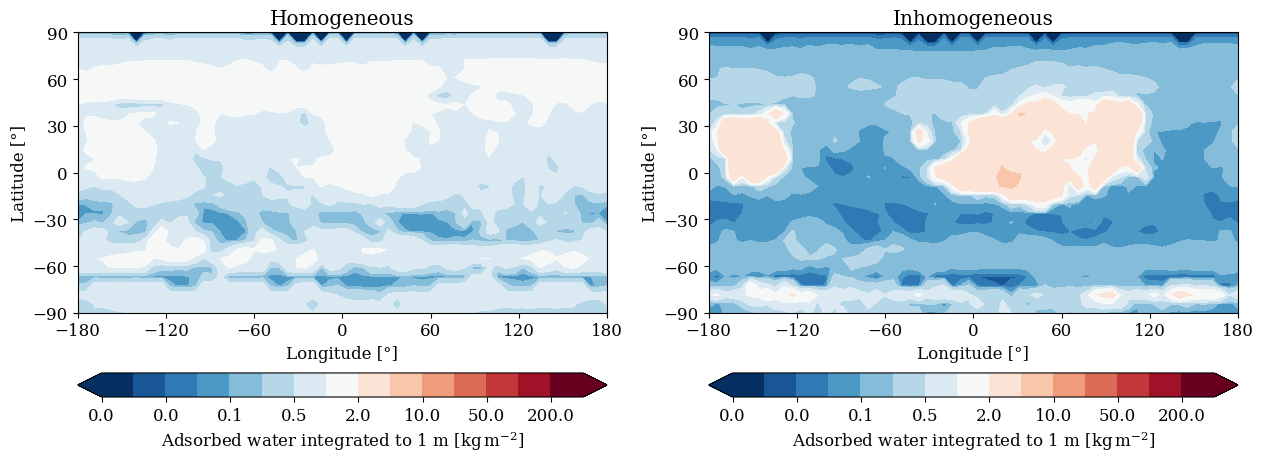

k,j,i =  0 0 0
k,j,i =  1 0 1


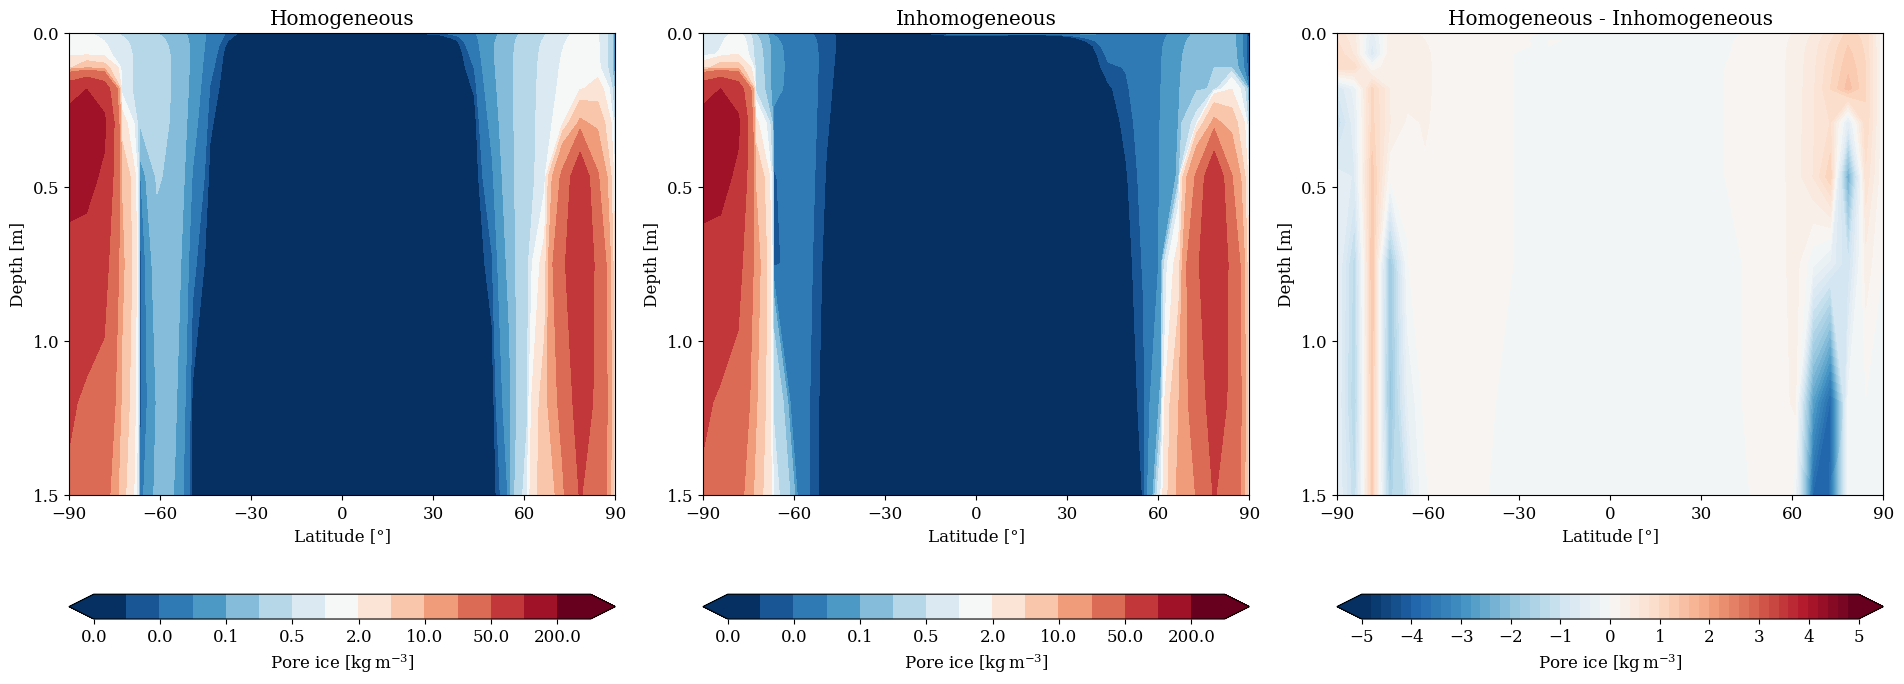

In [7]:
files = [
    '/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-ads46.20-20000/',
    '/mnt/dram2/koba/data/DHratio/MIRAI1k-spinup-adsinhom-20000/',
]
variables = [
    'wgv2',
    'wga2',
    'wgi2',
    'wgv2c',
    'wga2c',
    'wgi2c',
]
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),1,1,20,32,64
data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
for i in range(nf):
    for j in range(nv):
        print(files[i] + variables[j] + '.asc')
        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
data = data.reshape(nf,nv,nd,nt,nz,ny,nx)

def day_average(dat):
    return np.mean(dat, axis=2)

def roll_longitude(dat,nx):
    return np.roll(dat, int(nx/2), axis=-1)

def zonal_mean(dat):
    return np.mean(dat, axis=-1)

deg = 5.625
data_roll = roll_longitude(data,nx)
data_zm = zonal_mean(data)

labels = [
    r'Adsorbed water integrated to 1 m [$\rm kg \, m^{-2}$]',
    r'Adsorbed water integrated to 1 m [$\rm kg \, m^{-2}$]',
    r'Adsorbed water integrated to 1 m [$\rm kg \, m^{-2}$]',
]
titles = [
    'Homogeneous',
    'Inhomogeneous',
    'Homogeneous - Inhomogeneous',
]
factors = [1,1,1]
levels = [
#    [0,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10],
#    [0,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10],
    [0,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500],
    [0,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500],
    np.arange(-5,5.1,0.2),
]
import matplotlib.colors as colors
import copy
cmap = copy.copy(plt.get_cmap('RdBu_r')) # RdBu_r, Blues, GnBu, PuBu
layers = [
#0.000000, 
0.001000, 0.002600,
0.005160, 0.009256, 0.015810,
0.026295, 0.043073, 0.069916,
0.112866, 0.181585, 0.291536,
0.467458, 0.748933, 1.199293,
1.919869, 3.072791, 4.917465,
7.868944, 12.591311, 20.147097
]

ncols,nrows = 2,1
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j=i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)
    norm = colors.BoundaryNorm(levels[k], ncolors=256)
    mappable = axes[k].contourf(
        np.linspace(-180,180,64), np.linspace(-90,90,32)[::-1], 
        data[k,4,0,0,14,:,:]*factors[k],
        extend='both', cmap=cmap,
        levels=levels[k], norm=norm
    )
    plt.colorbar(mappable, ax=axes[k], orientation='horizontal', ticks=levels[k][::2]).set_label(labels[k])
    axes[k].set_xticks(np.linspace(-180,180,7))
    axes[k].set_yticks(np.linspace(-90,90,7))
    axes[k].set_xlabel('Longitude [°]')
    axes[k].set_ylabel('Latitude [°]')
    axes[k].set_title(titles[k])
plt.show()


labels = [
    r'Pore ice [$\rm kg \, m^{-3}$]',
    r'Pore ice [$\rm kg \, m^{-3}$]',
    r'Pore ice [$\rm kg \, m^{-3}$]',
]


ncols,nrows = 3,1
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows*1.5]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(2*nrows):
    k,j=i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)
    norm = colors.BoundaryNorm(levels[k], ncolors=256)
    mappable = axes[k].contourf(
        np.linspace(-90,90,32)[::-1], layers,
        data_zm[k,2,0,0,:,:]*factors[k],
        extend='both', cmap=cmap,
        levels=levels[k], norm=norm
    )
    plt.colorbar(mappable, ax=axes[k], orientation='horizontal', ticks=levels[k][::2]).set_label(labels[k])
#    norm = colors.BoundaryNorm([0.,0.000666, 0.00133, 0.00333, 0.00666, 0.0133, 0.0333, 0.0666, 0.133, 0.332, 0.662], ncolors=256)
#    mappable = axes[k].contourf(
#        np.linspace(-90,90,32)[::-1], layers,
#        data_zm[k,2,0,0,:,:]*factors[k],
#        extend='both', cmap=cmap,
#        levels=[0.,0.000666, 0.00133, 0.00333, 0.00666, 0.0133, 0.0333, 0.0666, 0.133, 0.332, 0.662], norm=norm
#    )
#    plt.colorbar(mappable, ax=axes[k], orientation='horizontal', ticks=[0.,0.000666, 0.00133, 0.00333, 0.00666, 0.0133, 0.0333, 0.0666, 0.133, 0.332, 0.662][::2]).set_label(r'Adsorbed water [wt%]')
    axes[k].set_xticks(np.linspace(-90,90,7))
    axes[k].set_yticks(np.linspace(0,20,5))
    axes[k].set_yticks(np.linspace(0,1.5,4))
    axes[k].set_xlabel('Latitude [°]')
    axes[k].set_ylabel('Depth [m]')
    axes[k].set_ylim(0,1.5)
#    axes[k].set_yscale('log')
    axes[k].invert_yaxis()
    axes[k].set_title(titles[k])

k=2
norm = colors.BoundaryNorm(levels[k], ncolors=256)
mappable = axes[k].contourf(
    np.linspace(-90,90,32)[::-1], layers,
    data_zm[0,2,0,0,:,:]*factors[k]-data_zm[1,2,0,0,:,:]*factors[k],
    extend='both', cmap=cmap,
    levels=levels[k], norm=norm
)
plt.colorbar(mappable, ax=axes[k], orientation='horizontal', ticks=levels[k][::5]).set_label(labels[k])
axes[k].set_xticks(np.linspace(-90,90,7))
axes[k].set_yticks(np.linspace(0,20,5))
axes[k].set_yticks(np.linspace(0,1.5,4))
axes[k].set_xlabel('Latitude [°]')
axes[k].set_ylabel('Depth [m]')
axes[k].set_ylim(0,1.5)
axes[k].invert_yaxis()
axes[k].set_title(titles[k])
plt.show()

/mnt/dram2/koba/data/MIRAI1k-spinup-adsinhom-20000/rd.asc
/mnt/dram2/koba/data/MIRAI1k-spinup-adsinhom-20000/ads0.asc
k,j,i =  0 0 0
k,j,i =  1 0 1


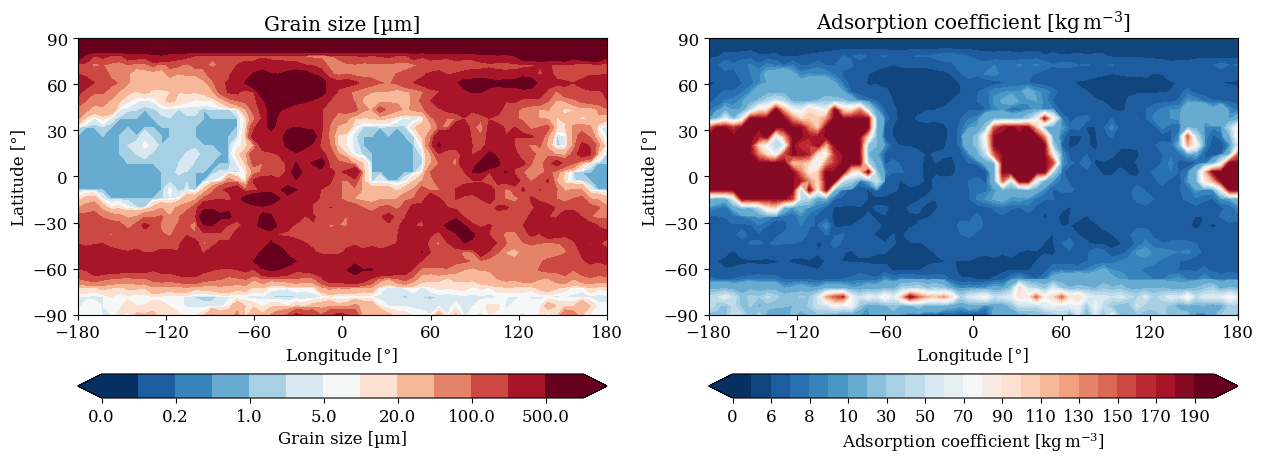

In [44]:
files = [
    '/mnt/dram2/koba/data/MIRAI1k-spinup-adsinhom-20000/',
]
variables = [
    'rd',
    'ads0',
]
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),1,1,1,32,64
data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
for i in range(nf):
    for j in range(nv):
        print(files[i] + variables[j] + '.asc')
        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
data = data.reshape(nf,nv,nd,nt,nz,ny,nx)

def roll_longitude(dat,nx):
    return np.roll(dat, int(nx/2), axis=-1)

deg = 5.625
data = roll_longitude(data,nx)

titles = [
    r'Grain size [µm]',
    r'Adsorption coefficient [$\rm kg \, m^{-3}$]',
]
factors = [1e6,1]
levels = [
    [0,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000],
    [0,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
]
import matplotlib.colors as colors
import copy
cmap = copy.copy(plt.get_cmap('RdBu_r')) # RdBu_r, Blues, GnBu, PuBu

ncols,nrows = 2,1
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j=i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)
    norm = colors.BoundaryNorm(levels[k], ncolors=256)
    mappable = axes[k].contourf(np.linspace(-180,180,64), np.linspace(-90,90,32)[::-1], 
                                data[0,k,0,0,0,:,:]*factors[k],
                                extend='both', cmap=cmap,
                                levels=levels[k], norm=norm)
    plt.colorbar(mappable, ax=axes[k], orientation='horizontal', ticks=levels[k][::2]).set_label(titles[k])
    axes[k].set_xticks(np.linspace(-180,180,7))
    axes[k].set_yticks(np.linspace(-90,90,7))
    axes[k].set_xlabel('Longitude [°]')
    axes[k].set_ylabel('Latitude [°]')
    axes[k].set_title(titles[k])
plt.show()

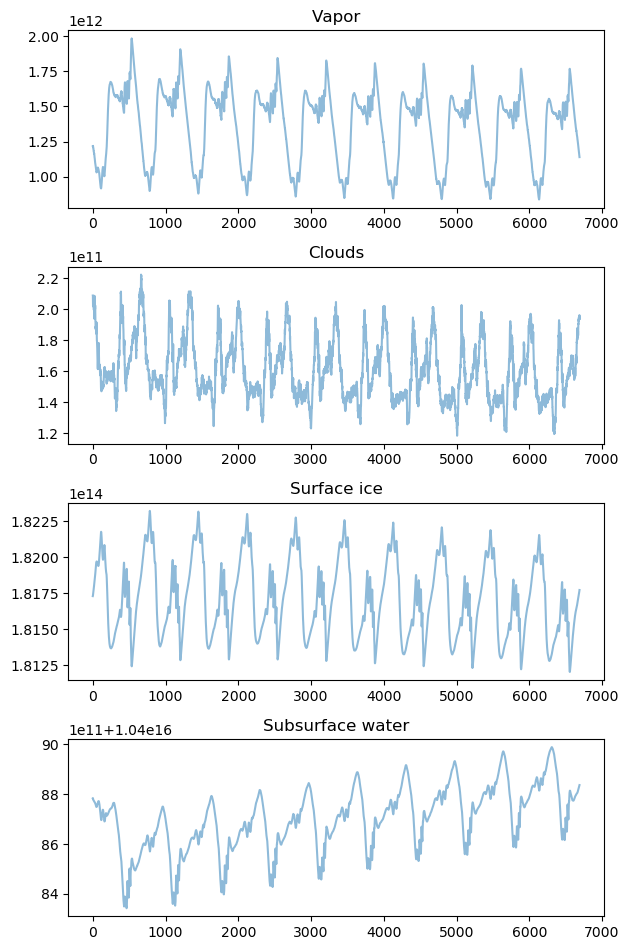

In [2]:
with open('/mnt/dram2/koba/data/MIRAI1k-active-adsinhom/H2OMASS.asc') as f:
    d1 = np.loadtxt(f, skiprows=1, usecols=[2,3,4,5])

titles = [
    'Vapor',
    'Clouds',
    'Surface ice',
    'Subsurface water',
]
ncols,nrows = 1,4
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*0.5*nrows]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(nrows):
    axes[i].plot(d1[:,i], alpha=0.5)
    axes[i].set_title(titles[i])
plt.show()

In [4]:
#files = [
#    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/',
#]
#variables = [
#    'T-1h-p',
#]
#nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),10,24,70,32,64
#data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
#for i in range(nf):
#    for j in range(nv):
#        print(files[i] + variables[j] + '.asc')
#        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
#data = data.reshape(nf,nv,nd,nt,nz,ny,nx)
#
#def localtime_aligner(dat,nx,deg):
#    dat_local = np.zeros_like(dat)
#    j=0 # initialize
#    for i in range(nx):
#        if (abs(15*j-deg*i) < 7.5):
#            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
#        else:
#            j=j+1
#            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
#    return dat_local
#
#def day_average(dat):
#    return np.mean(dat, axis=2)
#
#def roll_longitude(dat,nx):
#    return np.roll(dat, int(nx/2), axis=-1)
#
#deg = 5.625
#data_local = localtime_aligner(data,nx,deg)
#data_local_day_ave = day_average(data_local)
#data_local_day_ave_roll_lon = roll_longitude(data_local_day_ave,nx)

In [5]:
plev = np.array([
13.576     , 11.115     , 9.1001     , #3
7.4506     , 6.1000     , 4.9943     , #6
4.0890     , 3.3478     , 2.7409     , #9
2.2441     , 1.8373     , 1.5042     , #12
1.2316     , 1.0083     , 0.82555    , #15
0.67590    , 0.55338    , 0.45307    , #18
0.37094    , 0.30370    , 0.24865    , #21
0.20358    , 0.16667    , 0.13646    , #24
0.11173    , 9.14730E-02, 7.48918E-02, #27
6.13162E-02, 5.02015E-02, 4.11015E-02, #30
3.36510E-02, 2.75511E-02, 2.25570E-02, #33
1.84681E-02, 1.51204E-02, 1.23795E-02, #36
1.01355E-02, 8.29825E-03, 6.79403E-03, #39
5.56248E-03, 4.55417E-03, 3.72864E-03, #42
3.05275E-03, 2.49938E-03, 2.04632E-03, #45
1.67539E-03, 1.37169E-03, 1.12304E-03, #48
9.19472E-04, 7.52800E-04, 6.16340E-04, #51
5.04617E-04, 4.13145E-04, 3.38255E-04, #54
2.76940E-04, 2.26739E-04, 1.85638E-04, #57
1.51988E-04, 1.24437E-04, 1.01880E-04, #60
8.34126E-05, 6.82925E-05, 5.59131E-05, #63
4.57778E-05, 3.74797E-05, 3.06858E-05, #66
2.51234E-05, 2.05693E-05, 1.68407E-05, #69
1.37880E-05
])
import matplotlib.colors as colors
import copy
cmap = copy.copy(plt.get_cmap('RdBu_r')) # RdBu_r, Blues, GnBu, PuBu

lat = 10

#ncols,nrows = 1,6
#plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
#plt.rcParams['figure.autolayout'] = True
#fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
#for i in range(ncols*nrows):
#    k,j=i%ncols,int(i/ncols)
#    print('k,j,i = ', k,j,i)
#    mappable = axes[j].contourf(
#        np.linspace(-180,180,64), plev,
#        data_local_day_ave_roll_lon[k,0,4*j+2,:,lat,:],
#        levels=np.linspace(140,300,40),
#        extend='both',
#        cmap=cmap,
#    )
#    plt.colorbar(mappable, ax=axes[j]).set_label('Temperature [K]')
#    axes[j].set_ylim(1e-3,10)
#    axes[j].set_yscale('log')
#    axes[j].invert_yaxis()
#    axes[j].set_xlabel('Longitude [°]')
#    axes[j].set_ylabel('Pressure [hPa]')
#    axes[j].set_title(str(4*j+2)+'h LT')
#plt.show()

In [6]:
files = [
    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/',
]
variables = [
    'PS-1h',
]
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),10,24,1,32,64
data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
for i in range(nf):
    for j in range(nv):
        print(files[i] + variables[j] + '.asc')
        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
data = data.reshape(nf,nv,nd,nt,nz,ny,nx)

def localtime_aligner(dat,nx,deg):
    dat_local = np.zeros_like(dat)
    j=0 # initialize
    for i in range(nx):
        if (abs(15*j-deg*i) < 7.5):
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
        else:
            j=j+1
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
    return dat_local

def day_average(dat):
    return np.mean(dat, axis=2)

def roll_longitude(dat,nx):
    return np.roll(dat, int(nx/2), axis=-1)

deg = 5.625
PS_local = localtime_aligner(data,nx,deg)
PS_local_day_ave = day_average(PS_local)
PS_local_day_ave_roll_lon = roll_longitude(PS_local_day_ave,nx)

/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/PS-1h.asc


In [7]:
#files = [
#    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/',
#]
#variables = [
#    'colwv2d-1h-p',
#    'RHOWTR-1h-p',
#    'height-1h-p',
#]
#nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),10,24,70,32,64
#data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
#for i in range(nf):
#    for j in range(nv):
#        print(files[i] + variables[j] + '.asc')
#        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
#data = data.reshape(nf,nv,nd,nt,nz,ny,nx)
#
#def localtime_aligner(dat,nx,deg):
#    dat_local = np.zeros_like(dat)
#    j=0 # initialize
#    for i in range(nx):
#        if (abs(15*j-deg*i) < 7.5):
#            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
#        else:
#            j=j+1
#            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
#    return dat_local
#
#def day_average(dat):
#    return np.mean(dat, axis=2)
#
#def roll_longitude(dat,nx):
#    return np.roll(dat, int(nx/2), axis=-1)
#
#deg = 5.625
#data_local = localtime_aligner(data,nx,deg)
#data_local_day_ave = day_average(data_local)
#data_local_day_ave_roll_lon = roll_longitude(data_local_day_ave,nx)

In [8]:
plev = np.array([
13.576     , 11.115     , 9.1001     , #3
7.4506     , 6.1000     , 4.9943     , #6
4.0890     , 3.3478     , 2.7409     , #9
2.2441     , 1.8373     , 1.5042     , #12
1.2316     , 1.0083     , 0.82555    , #15
0.67590    , 0.55338    , 0.45307    , #18
0.37094    , 0.30370    , 0.24865    , #21
0.20358    , 0.16667    , 0.13646    , #24
0.11173    , 9.14730E-02, 7.48918E-02, #27
6.13162E-02, 5.02015E-02, 4.11015E-02, #30
3.36510E-02, 2.75511E-02, 2.25570E-02, #33
1.84681E-02, 1.51204E-02, 1.23795E-02, #36
1.01355E-02, 8.29825E-03, 6.79403E-03, #39
5.56248E-03, 4.55417E-03, 3.72864E-03, #42
3.05275E-03, 2.49938E-03, 2.04632E-03, #45
1.67539E-03, 1.37169E-03, 1.12304E-03, #48
9.19472E-04, 7.52800E-04, 6.16340E-04, #51
5.04617E-04, 4.13145E-04, 3.38255E-04, #54
2.76940E-04, 2.26739E-04, 1.85638E-04, #57
1.51988E-04, 1.24437E-04, 1.01880E-04, #60
8.34126E-05, 6.82925E-05, 5.59131E-05, #63
4.57778E-05, 3.74797E-05, 3.06858E-05, #66
2.51234E-05, 2.05693E-05, 1.68407E-05, #69
1.37880E-05
])
import matplotlib.colors as colors
import copy
cmap = copy.copy(plt.get_cmap('RdBu_r')) # RdBu_r, Blues, GnBu, PuBu

lat = 10

#print(data_local_day_ave_roll_lon.shape)
#scaled_wv = data_local_day_ave_roll_lon * 1e5 / (PS_local_day_ave_roll_lon * 1e2 / 610)
##rhodz = np.zeros_like(data_local_day_ave_roll_lon[:,1,:,:,:,:])
##for i in range(len(plev)-1):
##    rhodz[:,:,i,:,:] = data_local_day_ave_roll_lon[:,1,:,i,:,:] * (data_local_day_ave_roll_lon[:,2,:,i+1,:,:] - data_local_day_ave_roll_lon[:,2,:,i,:,:])
##    print(i, data_local_day_ave_roll_lon[0,2,0,i+1,15,0] - data_local_day_ave_roll_lon[0,2,0,i,15,0])
##scaled_wv = rhodz * 1e5 / (PS_local_day_ave_roll_lon[:,0,:,:69,:,:] * 1e2 / 610)
#
#titles = [
#    'Inactive, Nocloud, Ls = 180°',
#    'Inactive, Ls = 180°',
#    'Active, Ls = 180°',
#]
#
#ncols,nrows = 1,6
#plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
#plt.rcParams['figure.autolayout'] = True
#fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
#for i in range(ncols*nrows):
#    k,j=i%ncols,int(i/ncols)
#    print('k,j,i = ', k,j,i)
#    mappable = axes[j].contourf(
#        np.linspace(-180,180,64), plev,
##        data_local_day_ave_roll_lon[0,0,4*j+2,:,lat,:]*1e5,
#        scaled_wv[0,0,4*j+2,:,lat,:],
##        rhodz[0,4*j+2,:,lat,:]*1e5,
##        scaled_wv[0,4*j+2,:,lat,:],
#        levels=np.arange(0,301,5),
#        extend='both',
#        cmap=cmap,
#    )
#    plt.colorbar(mappable, ax=axes[j]).set_label(r'Water vapor mass mixing ratio [ppm]')
#    axes[j].set_ylim(1e-3,10)
#    axes[j].set_yscale('log')
#    axes[j].invert_yaxis()
#    axes[j].set_xlabel('Longitude [°]')
#    axes[j].set_ylabel('Pressure [hPa]')
#    axes[j].set_title(str(4*j+2)+'h LT, ')
#plt.show()

In [8]:
files = [
    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180-nocloud/',
    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/',
    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/',
]
variables = [
    'QV2-1h-p',
    'QL2-1h-p',
    'RHOWTR-1h-p',
]
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),10,24,70,32,64
data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
for i in range(nf):
    for j in range(nv):
        print(files[i] + variables[j] + '.asc')
        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
data = data.reshape(nf,nv,nd,nt,nz,ny,nx)

def localtime_aligner(dat,nx,deg):
    dat_local = np.zeros_like(dat)
    j=0 # initialize
    for i in range(nx):
        if (abs(15*j-deg*i) < 7.5):
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
        else:
            j=j+1
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
    return dat_local

def day_average(dat):
    return np.mean(dat, axis=2)

def roll_longitude(dat,nx):
    return np.roll(dat, int(nx/2), axis=-1)

deg = 5.625
data_local = localtime_aligner(data,nx,deg)
data_local_day_ave = day_average(data_local)
data_local_day_ave_roll_lon = roll_longitude(data_local_day_ave,nx)

/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180-nocloud/QV2-1h-p.asc


/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180-nocloud/QL2-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180-nocloud/RHOWTR-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/QV2-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/QL2-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/RHOWTR-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/QV2-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/QL2-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/RHOWTR-1h-p.asc


(3, 3, 24, 70, 32, 64)
k,j,i =  0 0 0
k,j,i =  1 0 1
k,j,i =  2 0 2
k,j,i =  0 1 3
k,j,i =  1 1 4
k,j,i =  2 1 5
k,j,i =  0 2 6
k,j,i =  1 2 7
k,j,i =  2 2 8
k,j,i =  0 3 9
k,j,i =  1 3 10
k,j,i =  2 3 11
k,j,i =  0 4 12
k,j,i =  1 4 13


k,j,i =  2 4 14
k,j,i =  0 5 15
k,j,i =  1 5 16
k,j,i =  2 5 17


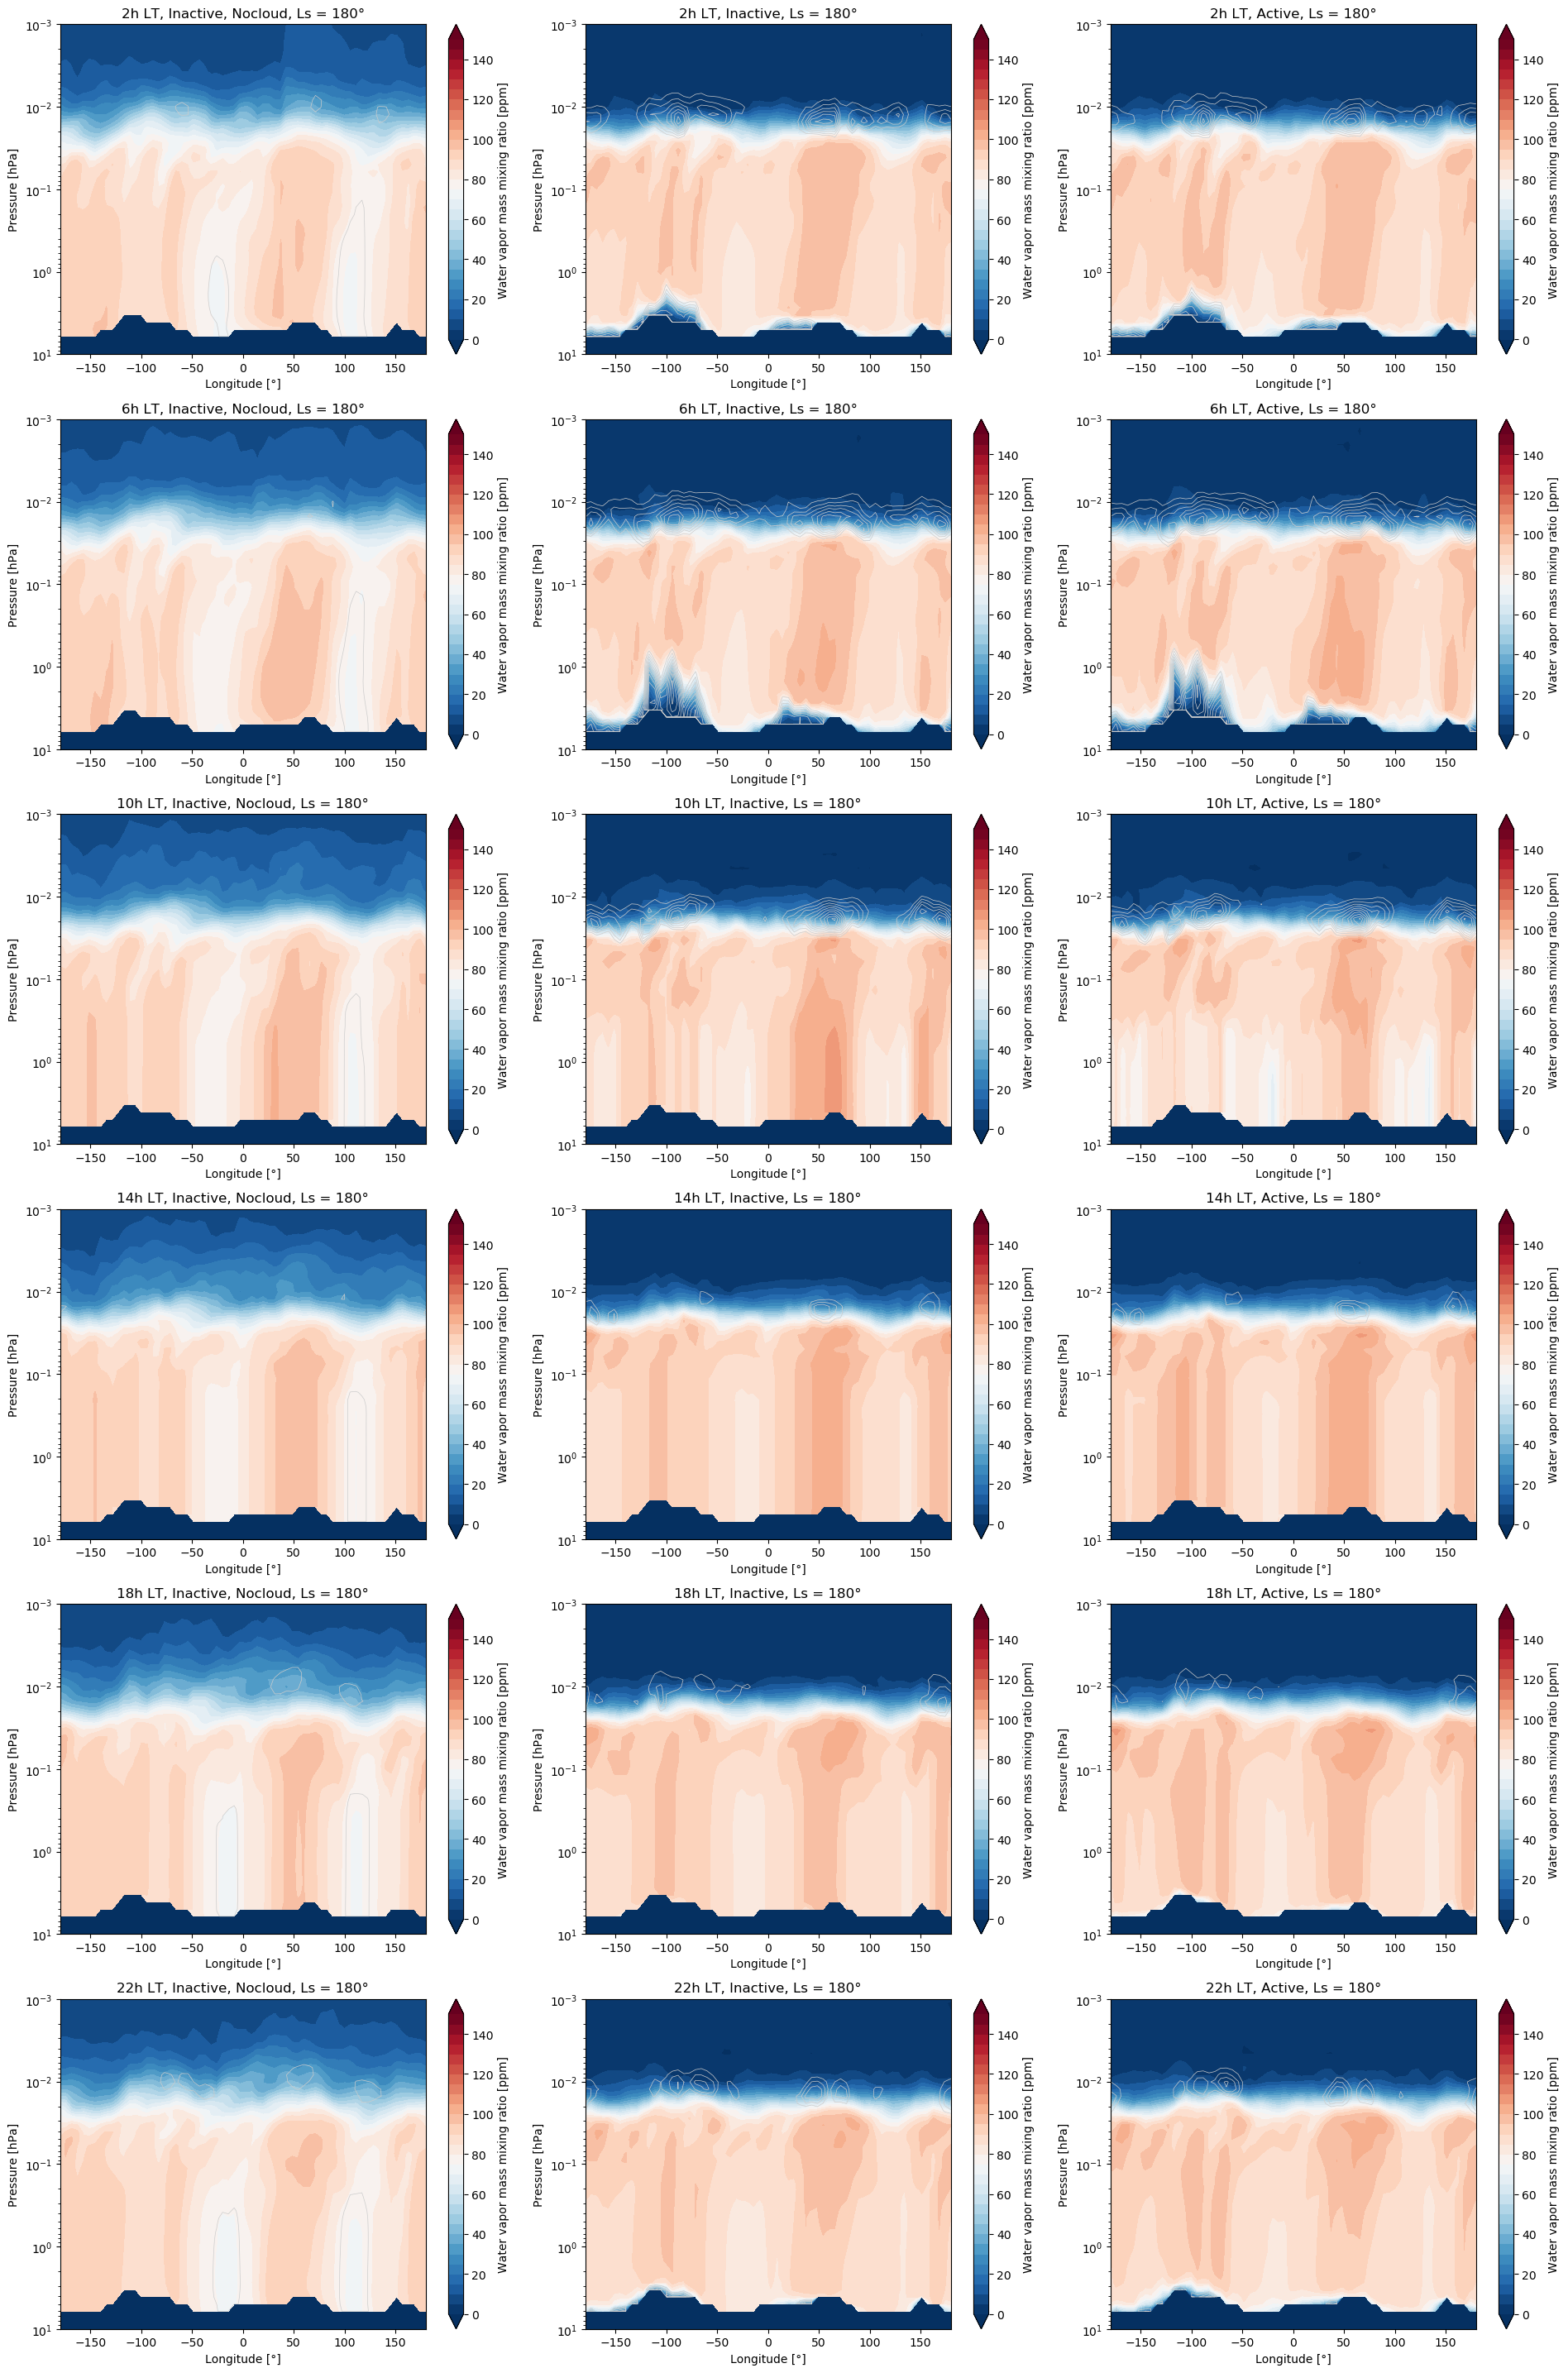

In [9]:
plev = np.array([
13.576     , 11.115     , 9.1001     , #3
7.4506     , 6.1000     , 4.9943     , #6
4.0890     , 3.3478     , 2.7409     , #9
2.2441     , 1.8373     , 1.5042     , #12
1.2316     , 1.0083     , 0.82555    , #15
0.67590    , 0.55338    , 0.45307    , #18
0.37094    , 0.30370    , 0.24865    , #21
0.20358    , 0.16667    , 0.13646    , #24
0.11173    , 9.14730E-02, 7.48918E-02, #27
6.13162E-02, 5.02015E-02, 4.11015E-02, #30
3.36510E-02, 2.75511E-02, 2.25570E-02, #33
1.84681E-02, 1.51204E-02, 1.23795E-02, #36
1.01355E-02, 8.29825E-03, 6.79403E-03, #39
5.56248E-03, 4.55417E-03, 3.72864E-03, #42
3.05275E-03, 2.49938E-03, 2.04632E-03, #45
1.67539E-03, 1.37169E-03, 1.12304E-03, #48
9.19472E-04, 7.52800E-04, 6.16340E-04, #51
5.04617E-04, 4.13145E-04, 3.38255E-04, #54
2.76940E-04, 2.26739E-04, 1.85638E-04, #57
1.51988E-04, 1.24437E-04, 1.01880E-04, #60
8.34126E-05, 6.82925E-05, 5.59131E-05, #63
4.57778E-05, 3.74797E-05, 3.06858E-05, #66
2.51234E-05, 2.05693E-05, 1.68407E-05, #69
1.37880E-05
])
import matplotlib.colors as colors
import copy
cmap = copy.copy(plt.get_cmap('RdBu_r')) # RdBu_r, Blues, GnBu, PuBu

lat = 10
print(data_local_day_ave_roll_lon.shape)
titles = [
    'Inactive, Nocloud, Ls = 180°',
    'Inactive, Ls = 180°',
    'Active, Ls = 180°',
]

ncols,nrows = 3,6
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j=i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)
    mappable = axes[j,k].contourf(
        np.linspace(-180,180,64), plev,
        data_local_day_ave_roll_lon[k,0,4*j+2,:,lat,:]*1e6,
        levels=np.arange(0,151,5),
        extend='both',
        cmap=cmap,
    )
    plt.colorbar(mappable, ax=axes[j,k]).set_label(r'Water vapor mass mixing ratio [ppm]')
    axes[j,k].contour(
        np.linspace(-180,180,64), plev,
        data_local_day_ave_roll_lon[k,1,4*j+2,:,lat,:]*1e6,
        levels=np.arange(10,151,5),
        colors='0.8', linewidths=0.5, 
    )
    axes[j,k].set_ylim(1e-3,10)
    axes[j,k].set_yscale('log')
    axes[j,k].invert_yaxis()
    axes[j,k].set_xlabel('Longitude [°]')
    axes[j,k].set_ylabel('Pressure [hPa]')
    axes[j,k].set_title(str(4*j+2)+'h LT, '+titles[k])
plt.show()

(3, 3, 24, 70, 32, 64)
k,j,i =  0 0 0


k,j,i =  1 0 1
k,j,i =  2 0 2
k,j,i =  0 1 3
k,j,i =  1 1 4
k,j,i =  2 1 5
k,j,i =  0 2 6
k,j,i =  1 2 7
k,j,i =  2 2 8
k,j,i =  0 3 9
k,j,i =  1 3 10
k,j,i =  2 3 11
k,j,i =  0 4 12
k,j,i =  1 4 13
k,j,i =  2 4 14
k,j,i =  0 5 15
k,j,i =  1 5 16
k,j,i =  2 5 17


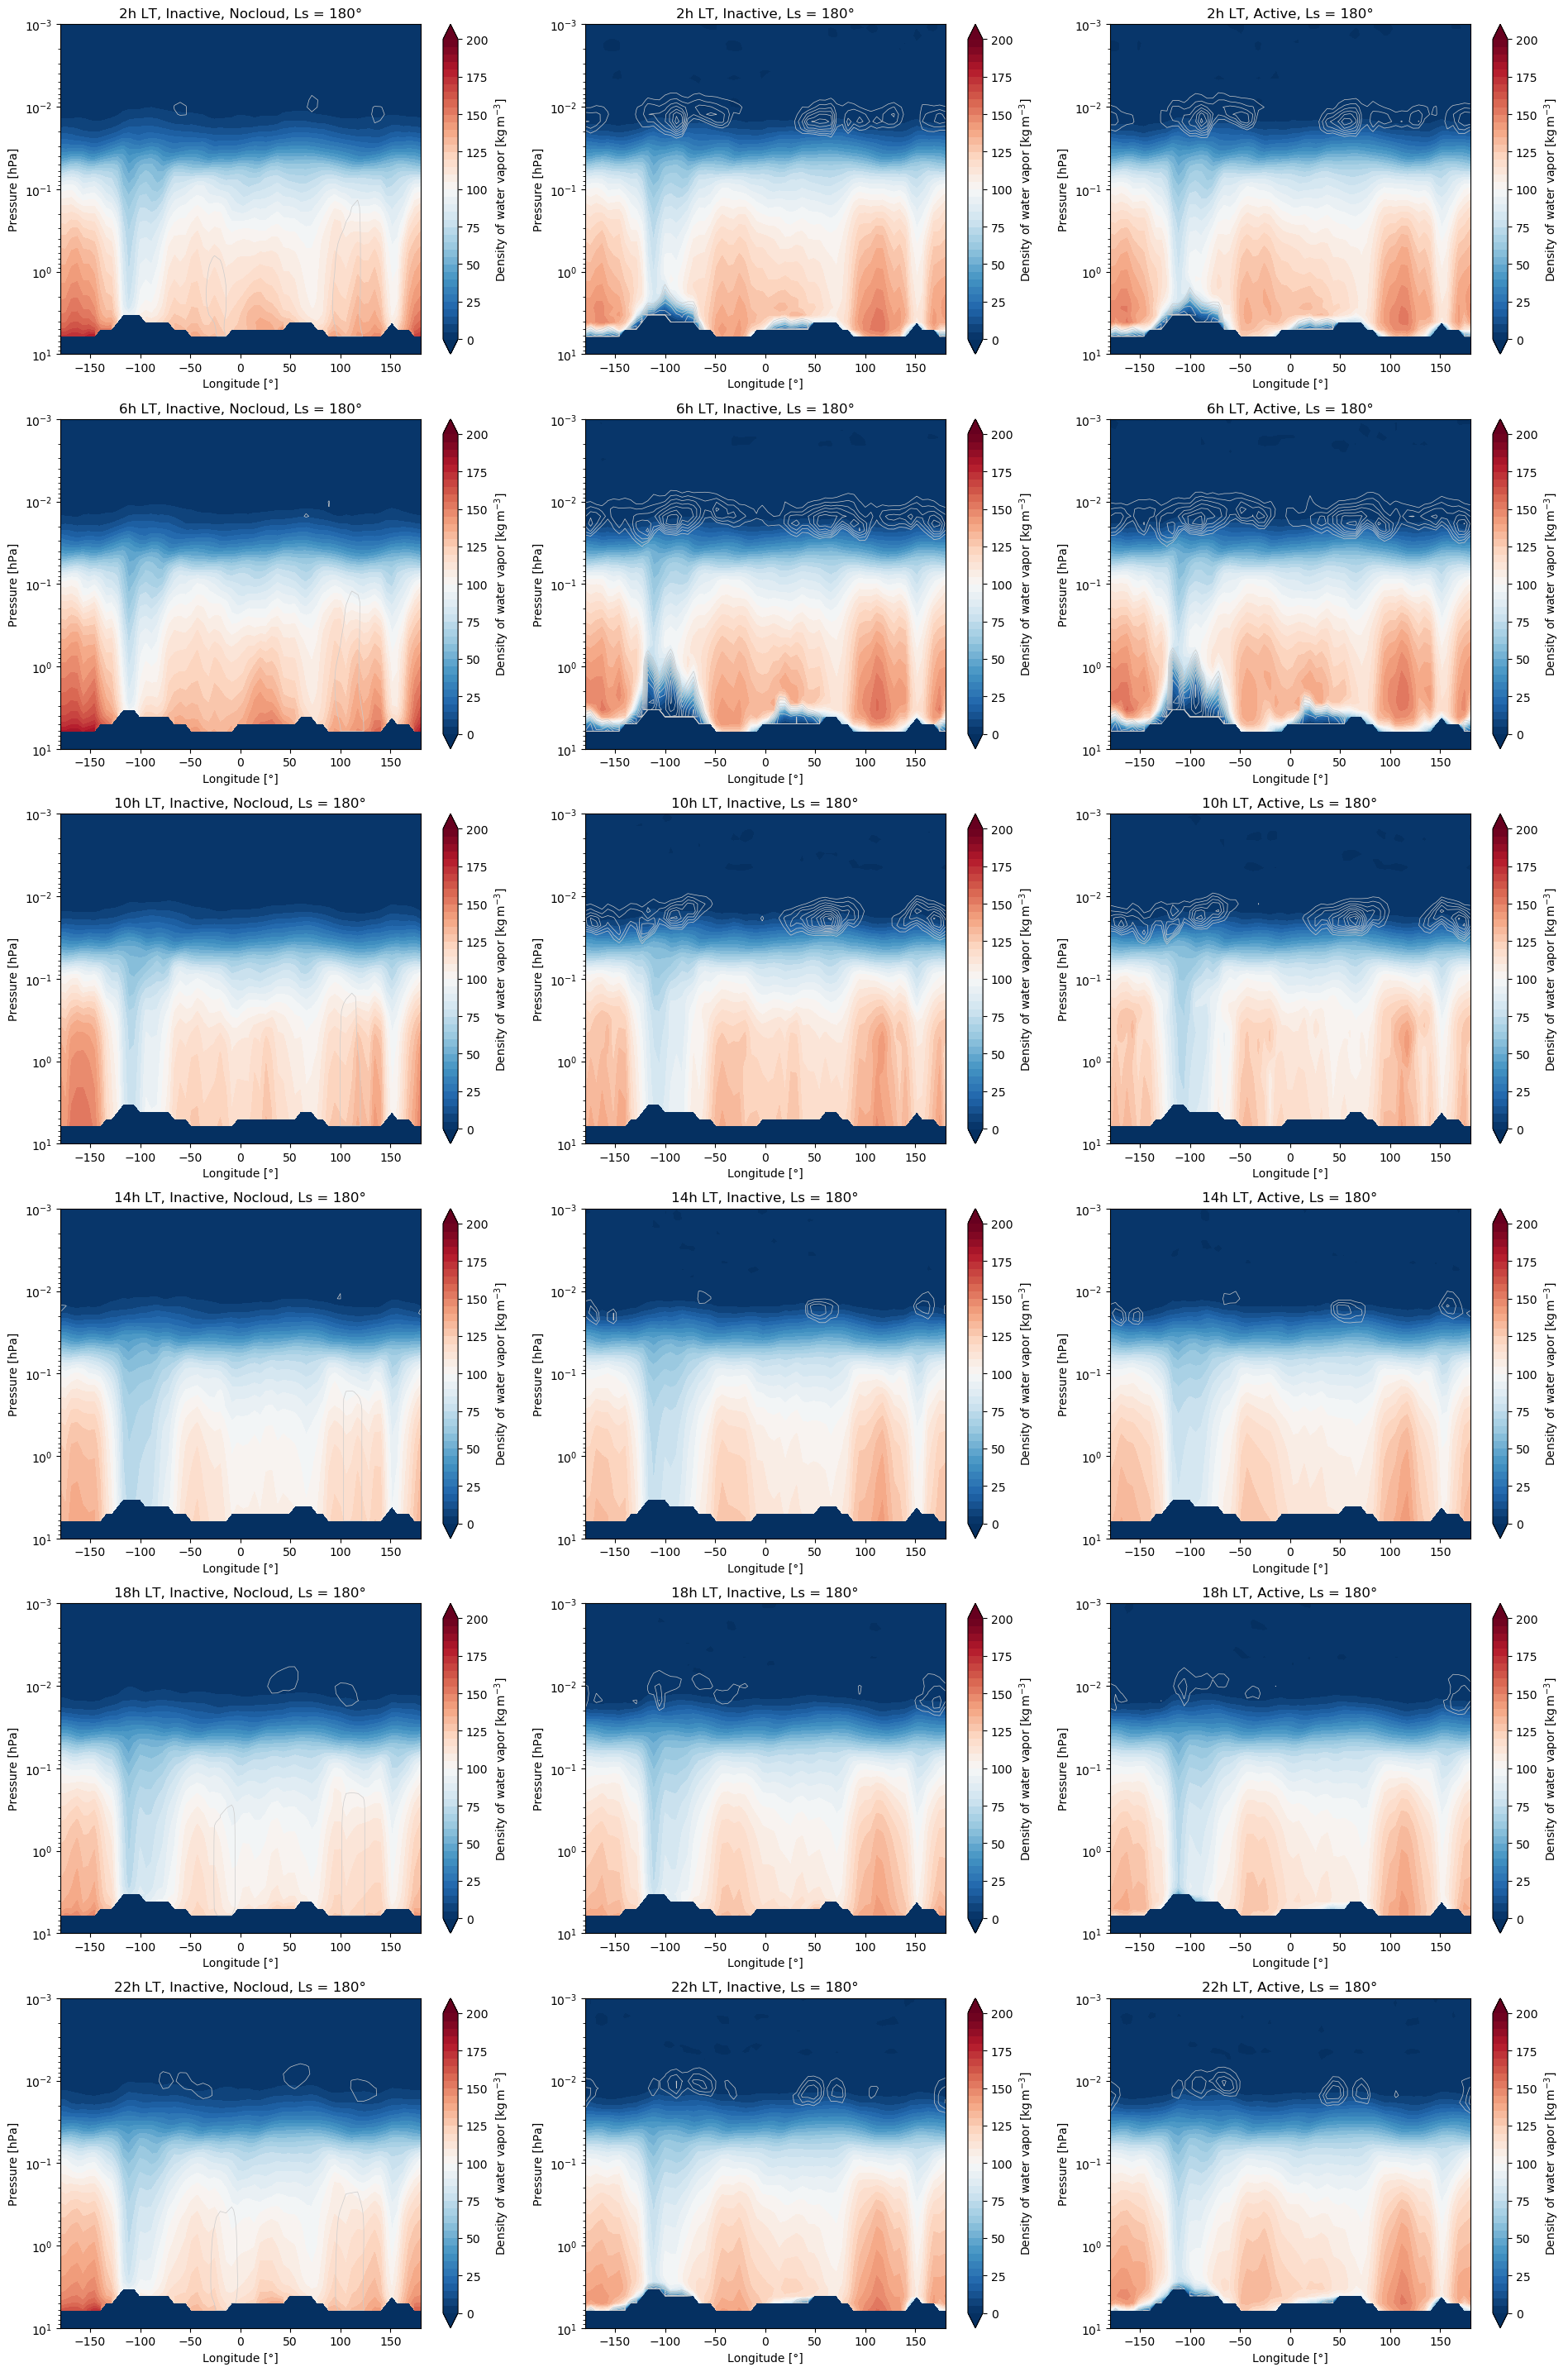

In [10]:
lat = 10
print(data_local_day_ave_roll_lon.shape)

ncols,nrows = 3,6
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j=i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)
    mappable = axes[j,k].contourf(
        np.linspace(-180,180,64), plev,
        data_local_day_ave_roll_lon[k,2,4*j+2,:,lat,:]*1e8,
        levels=np.arange(0,201,5),
        extend='both',
        cmap=cmap,
    )
    plt.colorbar(mappable, ax=axes[j,k]).set_label(r'Density of water vapor [$\rm kg \, m^{-3}$]')
    axes[j,k].contour(
        np.linspace(-180,180,64), plev,
        data_local_day_ave_roll_lon[k,1,4*j+2,:,lat,:]*1e6,
        levels=np.arange(10,151,5),
        colors='0.8', linewidths=0.5, 
    )
    axes[j,k].set_ylim(1e-3,10)
    axes[j,k].set_yscale('log')
    axes[j,k].invert_yaxis()
    axes[j,k].set_xlabel('Longitude [°]')
    axes[j,k].set_ylabel('Pressure [hPa]')
    axes[j,k].set_title(str(4*j+2)+'h LT, '+titles[k])
plt.show()

(3, 3, 24, 70, 32, 64)


k,j,i =  0 0 0
k,j,i =  1 0 1
k,j,i =  2 0 2
k,j,i =  0 1 3
k,j,i =  1 1 4
k,j,i =  2 1 5
k,j,i =  0 2 6
k,j,i =  1 2 7
k,j,i =  2 2 8
k,j,i =  0 3 9
k,j,i =  1 3 10
k,j,i =  2 3 11
k,j,i =  0 4 12
k,j,i =  1 4 13
k,j,i =  2 4 14
k,j,i =  0 5 15
k,j,i =  1 5 16
k,j,i =  2 5 17


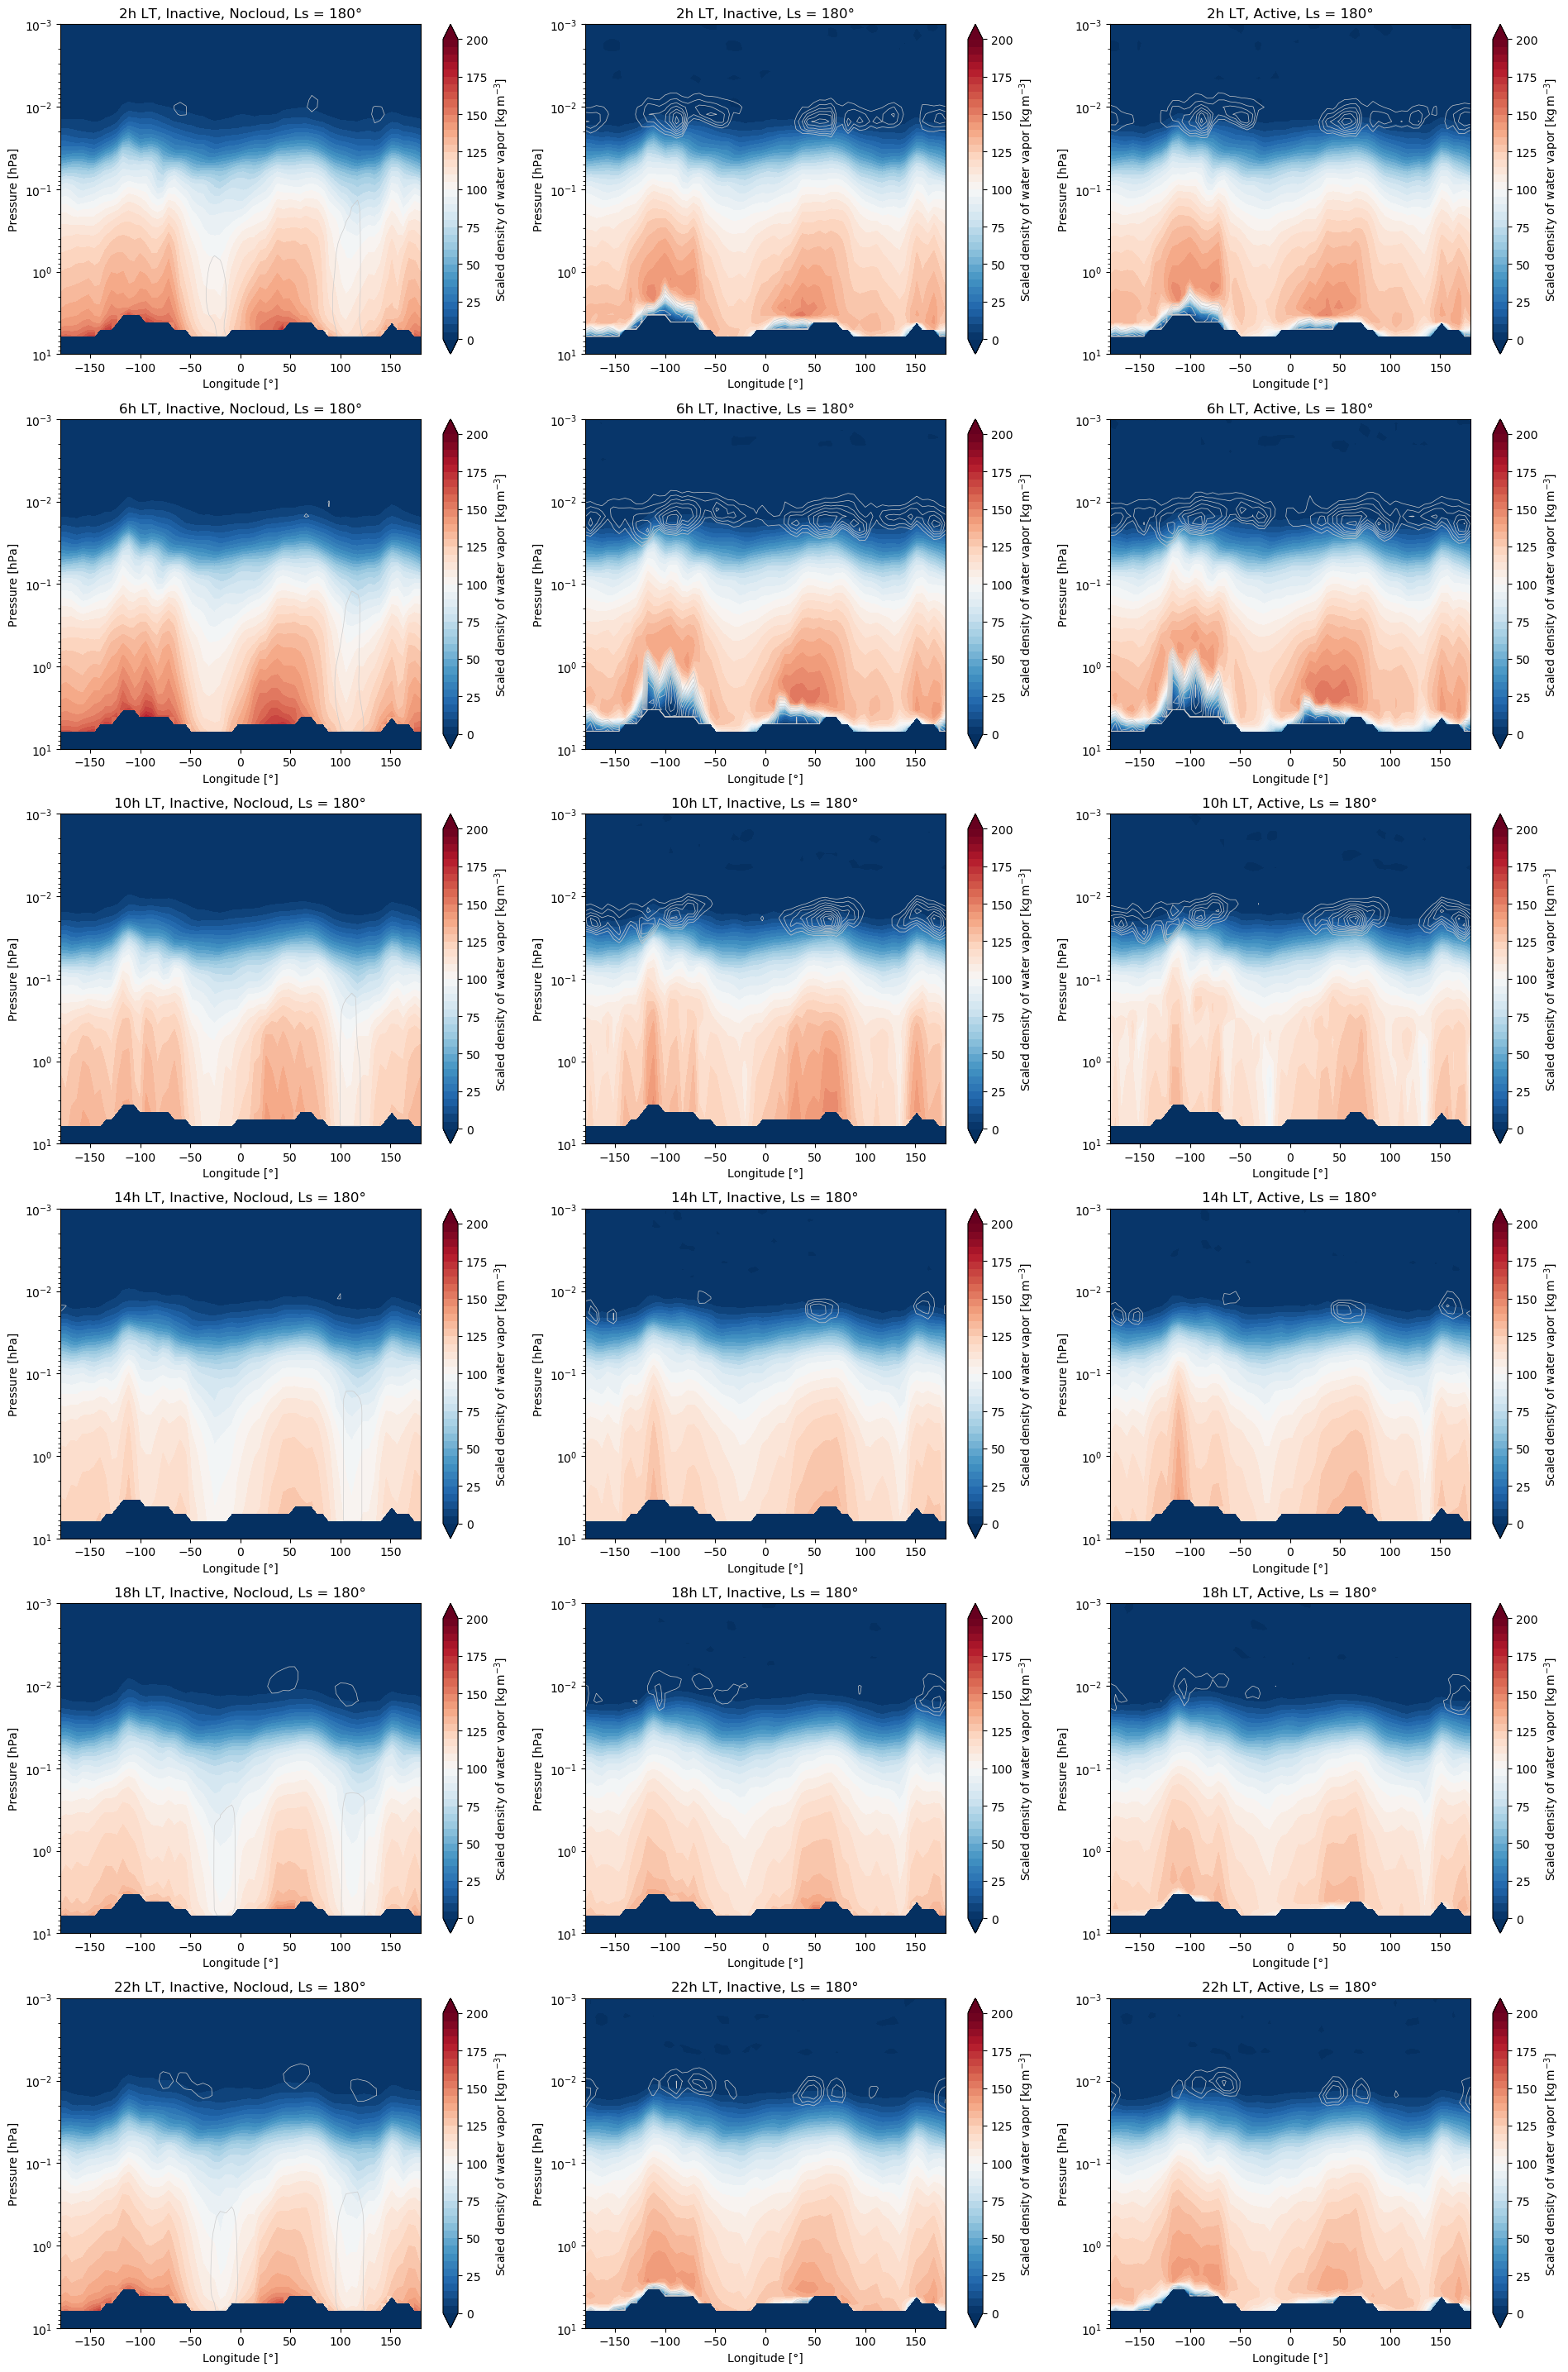

In [11]:
lat = 10
print(data_local_day_ave_roll_lon.shape)
scaled_wv = data_local_day_ave_roll_lon * 1e8 / (PS_local_day_ave_roll_lon * 1e2 / 610)

ncols,nrows = 3,6
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j=i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)
    mappable = axes[j,k].contourf(
        np.linspace(-180,180,64), plev,
        scaled_wv[k,2,4*j+2,:,lat,:],
        levels=np.arange(0,201,5),
        extend='both',
        cmap=cmap,
    )
    plt.colorbar(mappable, ax=axes[j,k]).set_label(r'Scaled density of water vapor [$\rm kg \, m^{-3}$]')
    axes[j,k].contour(
        np.linspace(-180,180,64), plev,
        data_local_day_ave_roll_lon[k,1,4*j+2,:,lat,:]*1e6,
        levels=np.arange(10,151,5),
        colors='0.8', linewidths=0.5, 
    )
    axes[j,k].set_ylim(1e-3,10)
    axes[j,k].set_yscale('log')
    axes[j,k].invert_yaxis()
    axes[j,k].set_xlabel('Longitude [°]')
    axes[j,k].set_ylabel('Pressure [hPa]')
    axes[j,k].set_title(str(4*j+2)+'h LT, '+titles[k])
plt.show()

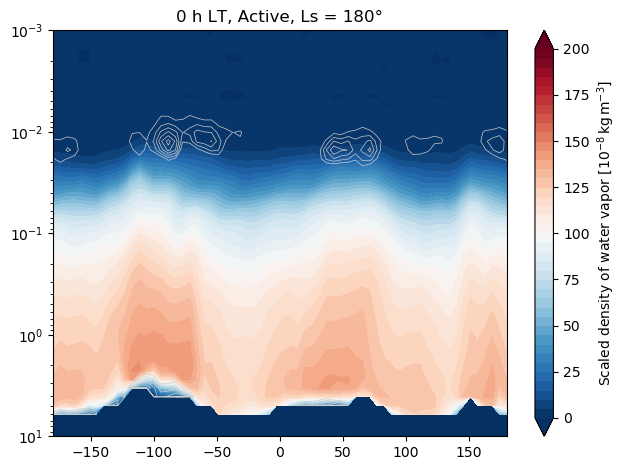

In [25]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

k=2

ncols,nrows = 1,1
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,ax = plt.subplots(nrows=nrows, ncols=ncols)
mappable = ax.contourf(
    np.linspace(-180,180,64), plev,
#    data_local_day_ave_roll_lon[k,0,0,:,lat,:]*1e6,
#    levels=np.arange(0,151,5),
    scaled_wv[k,2,0,:,lat,:],
    levels=np.arange(0,201,5),
    extend='both',
    cmap=cmap,
)
#plt.colorbar(mappable, ax=ax).set_label(r'Water vapor mass mixing ratio [ppm]')
plt.colorbar(mappable, ax=ax).set_label(r'Scaled density of water vapor [$\rm 10^{-8} \, kg \, m^{-3}$]')
ax.contour(
    np.linspace(-180,180,64), plev,
    data_local_day_ave_roll_lon[k,1,0,:,lat,:]*1e6,
    levels=np.arange(0,151,5),
    colors='0.8', linewidths=0.5, 
)
ax.set_ylim(1e-3,10)
ax.set_yscale('log')
ax.invert_yaxis()
ax.set_xlabel('Longitude [°]')
ax.set_xlabel('Pressure [hPa]')
title = ax.set_title(f'{0} h LT, '+titles[k])

def update(frame):
    ax.clear()
    mappable = ax.contourf(
        np.linspace(-180,180,64), plev,
#        data_local_day_ave_roll_lon[k,0,frame,:,lat,:]*1e6,
#        levels=np.arange(0,151,5),
        scaled_wv[k,2,frame,:,lat,:],
        levels=np.arange(0,201,5),
        extend='both',
        cmap=cmap,
    )
    ax.contour(
        np.linspace(-180,180,64), plev,
        data_local_day_ave_roll_lon[k,1,frame,:,lat,:]*1e6,
        levels=np.arange(10,151,5),
        colors='0.8', linewidths=0.5, 
    )
    ax.set_ylim(1e-3,10)
    ax.set_yscale('log')
    ax.invert_yaxis()
    title = ax.set_title(f'{frame} h LT, '+titles[k])
    return []

ani = animation.FuncAnimation(fig, update, frames=nt, interval=100, blit=False)
#ani.save("simulation-QV2_"+titles[k]+".gif", writer=PillowWriter(fps=5))
ani.save("simulation-RHOH2O_"+titles[k]+".gif", writer=PillowWriter(fps=5))

In [11]:
files = [
    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180-inactive-nocloud/',
#    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180-nocloud/',
#    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/',
#    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/',
]
variables = [
    'T-1h-p',
    'pivel-1h-p',
    'RHOAIR-1h-p',
    'U-1h-p',
]
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),10,24,70,32,64
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),49,24,70,32,64
data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
for i in range(nf):
    for j in range(nv):
        print(files[i] + variables[j] + '.asc')
        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
data = data.reshape(nf,nv,nd,nt,nz,ny,nx)

def localtime_aligner(dat,nx,deg):
    dat_local = np.zeros_like(dat)
    j=0 # initialize
    for i in range(nx):
        if (abs(15*j-deg*i) < 7.5):
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
        else:
            j=j+1
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
    return dat_local

def day_average(dat):
    return np.mean(dat, axis=2)

def roll_longitude(dat,nx):
    return np.roll(dat, int(nx/2), axis=-1)

deg = 5.625
data_local = localtime_aligner(data,nx,deg)
#data_loca_day_ave = day_average(data_local)
#data_loca_day_ave_roll_lon = roll_longitude(data_loca_day_ave,nx)

/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180-inactive-nocloud/T-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180-inactive-nocloud/pivel-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180-inactive-nocloud/RHOAIR-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180-inactive-nocloud/U-1h-p.asc


In [12]:
R = 188.9       # 空気の気体定数 [J/(kg K)]
g = 3.72        # 重力加速度 [m/s^2]

def pvel_to_w(omega, rho):
    # 単位変換
    w = - omega*1e2 / (rho * g)
    return w

data_loca_day_ave = day_average(data_local[:,:,39:,:,:,:,:])
data_loca_day_ave_roll_lon = roll_longitude(data_loca_day_ave,nx)

T     = data_loca_day_ave_roll_lon[:,0,:,:,:,:]
omega = data_loca_day_ave_roll_lon[:,1,:,:,:,:]
rho   = data_loca_day_ave_roll_lon[:,2,:,:,:,:]
u     = data_loca_day_ave_roll_lon[:,3,:,:,:,:]
w     = pvel_to_w(omega, rho)
print(w.shape)

def p_to_z(plev, T, z0=0):
    """
    圧力 plev [Pa] と温度 T [K] から鉛直高度 z [m] を計算
    欠損値(-999)は補間されます。
    """
    p = np.array(plev, dtype=float)
    T = np.array(T, dtype=float)

    # -999 を NaN に置換
    T[T <= -999] = np.nan

    # NaN 補間（線形補間）
    nans = np.isnan(T)
    if np.any(nans):
        x = np.arange(len(T))
        T[nans] = np.interp(x[nans], x[~nans], T[~nans])

    z = np.zeros_like(p)
    z[0] = z0

    for k in range(1, len(p)):
        Tv = 0.5 * (T[k-1] + T[k])  # 区間平均温度
        z[k] = z[k-1] + (R * Tv / g) * np.log(p[k-1] / p[k])

    return z

plev = [
13.576     , 11.115     , 9.1001     , #3
7.4506     , 6.1000     , 4.9943     , #6
4.0890     , 3.3478     , 2.7409     , #9
2.2441     , 1.8373     , 1.5042     , #12
1.2316     , 1.0083     , 0.82555    , #15
0.67590    , 0.55338    , 0.45307    , #18
0.37094    , 0.30370    , 0.24865    , #21
0.20358    , 0.16667    , 0.13646    , #24
0.11173    , 9.14730E-02, 7.48918E-02, #27
6.13162E-02, 5.02015E-02, 4.11015E-02, #30
3.36510E-02, 2.75511E-02, 2.25570E-02, #33
1.84681E-02, 1.51204E-02, 1.23795E-02, #36
1.01355E-02, 8.29825E-03, 6.79403E-03, #39
5.56248E-03, 4.55417E-03, 3.72864E-03, #42
3.05275E-03, 2.49938E-03, 2.04632E-03, #45
1.67539E-03, 1.37169E-03, 1.12304E-03, #48
9.19472E-04, 7.52800E-04, 6.16340E-04, #51
5.04617E-04, 4.13145E-04, 3.38255E-04, #54
2.76940E-04, 2.26739E-04, 1.85638E-04, #57
1.51988E-04, 1.24437E-04, 1.01880E-04, #60
8.34126E-05, 6.82925E-05, 5.59131E-05, #63
4.57778E-05, 3.74797E-05, 3.06858E-05, #66
2.51234E-05, 2.05693E-05, 1.68407E-05, #69
1.37880E-05
]
# 1日平均、経度平均した、赤道付近の温度を使って鉛直高度を導出してみた
# ハイプソメトリック方程式
T_mean = np.average(T[0,:,:,:,:], axis=0)
#print(T_mean.shape)
T_mean_zm = np.average(T_mean, axis=-1)
#print(T_mean_zm.shape)
#print(T_mean_zm[:,15])
zlev = p_to_z(plev, T_mean_zm[:,15], z0=0)
print(zlev)
zlev = np.clip(zlev, 0, None)
print(zlev)

for i in range(70):
    print(i, plev[i], zlev[i]/1e3, 'km')

(1, 24, 70, 32, 64)
[     0.          -6955.71899895 -13911.51327062 -20866.63604552
 -27822.27903423 -32630.92539188 -33433.70456761 -32122.3791467
 -30176.83407416 -27846.89651347 -25507.69144375 -23161.68174683
 -20811.29726258 -18455.02252986 -16095.61822065 -13732.34701218
 -11366.05381331  -8997.16372737  -6626.24348602  -4254.40710515
  -1883.07539244    485.79824815   2850.66263333   5207.39575154
   7553.6717776    9889.71820942  12212.29213285  14516.63376034
  16791.98368172  19024.23590557  21202.65121725  23323.10056529
  25383.29404447  27379.25909501  29306.74635574  31164.2684912
  32954.5143648   34683.41186252  36356.85720603  37979.32739225
  39556.83322169  41099.08735372  42616.26402002  44114.66474137
  45595.48128703  47056.77826761  48497.27561884  49918.43997701
  51322.78110658  52710.00370688  54075.48826621  55413.83768786
  56723.4021006   58007.51989028  59272.80416176  60526.65940407
  61775.67809769  62562.15363994  60665.55912138  54597.51109963
  45901

k,j,i =  0 0 0
k,j,i =  1 0 1
k,j,i =  2 0 2
k,j,i =  0 1 3
k,j,i =  1 1 4


k,j,i =  2 1 5
k,j,i =  0 2 6
k,j,i =  1 2 7
k,j,i =  2 2 8
k,j,i =  0 3 9
k,j,i =  1 3 10
k,j,i =  2 3 11
k,j,i =  0 4 12
k,j,i =  1 4 13
k,j,i =  2 4 14
k,j,i =  0 5 15
k,j,i =  1 5 16
k,j,i =  2 5 17


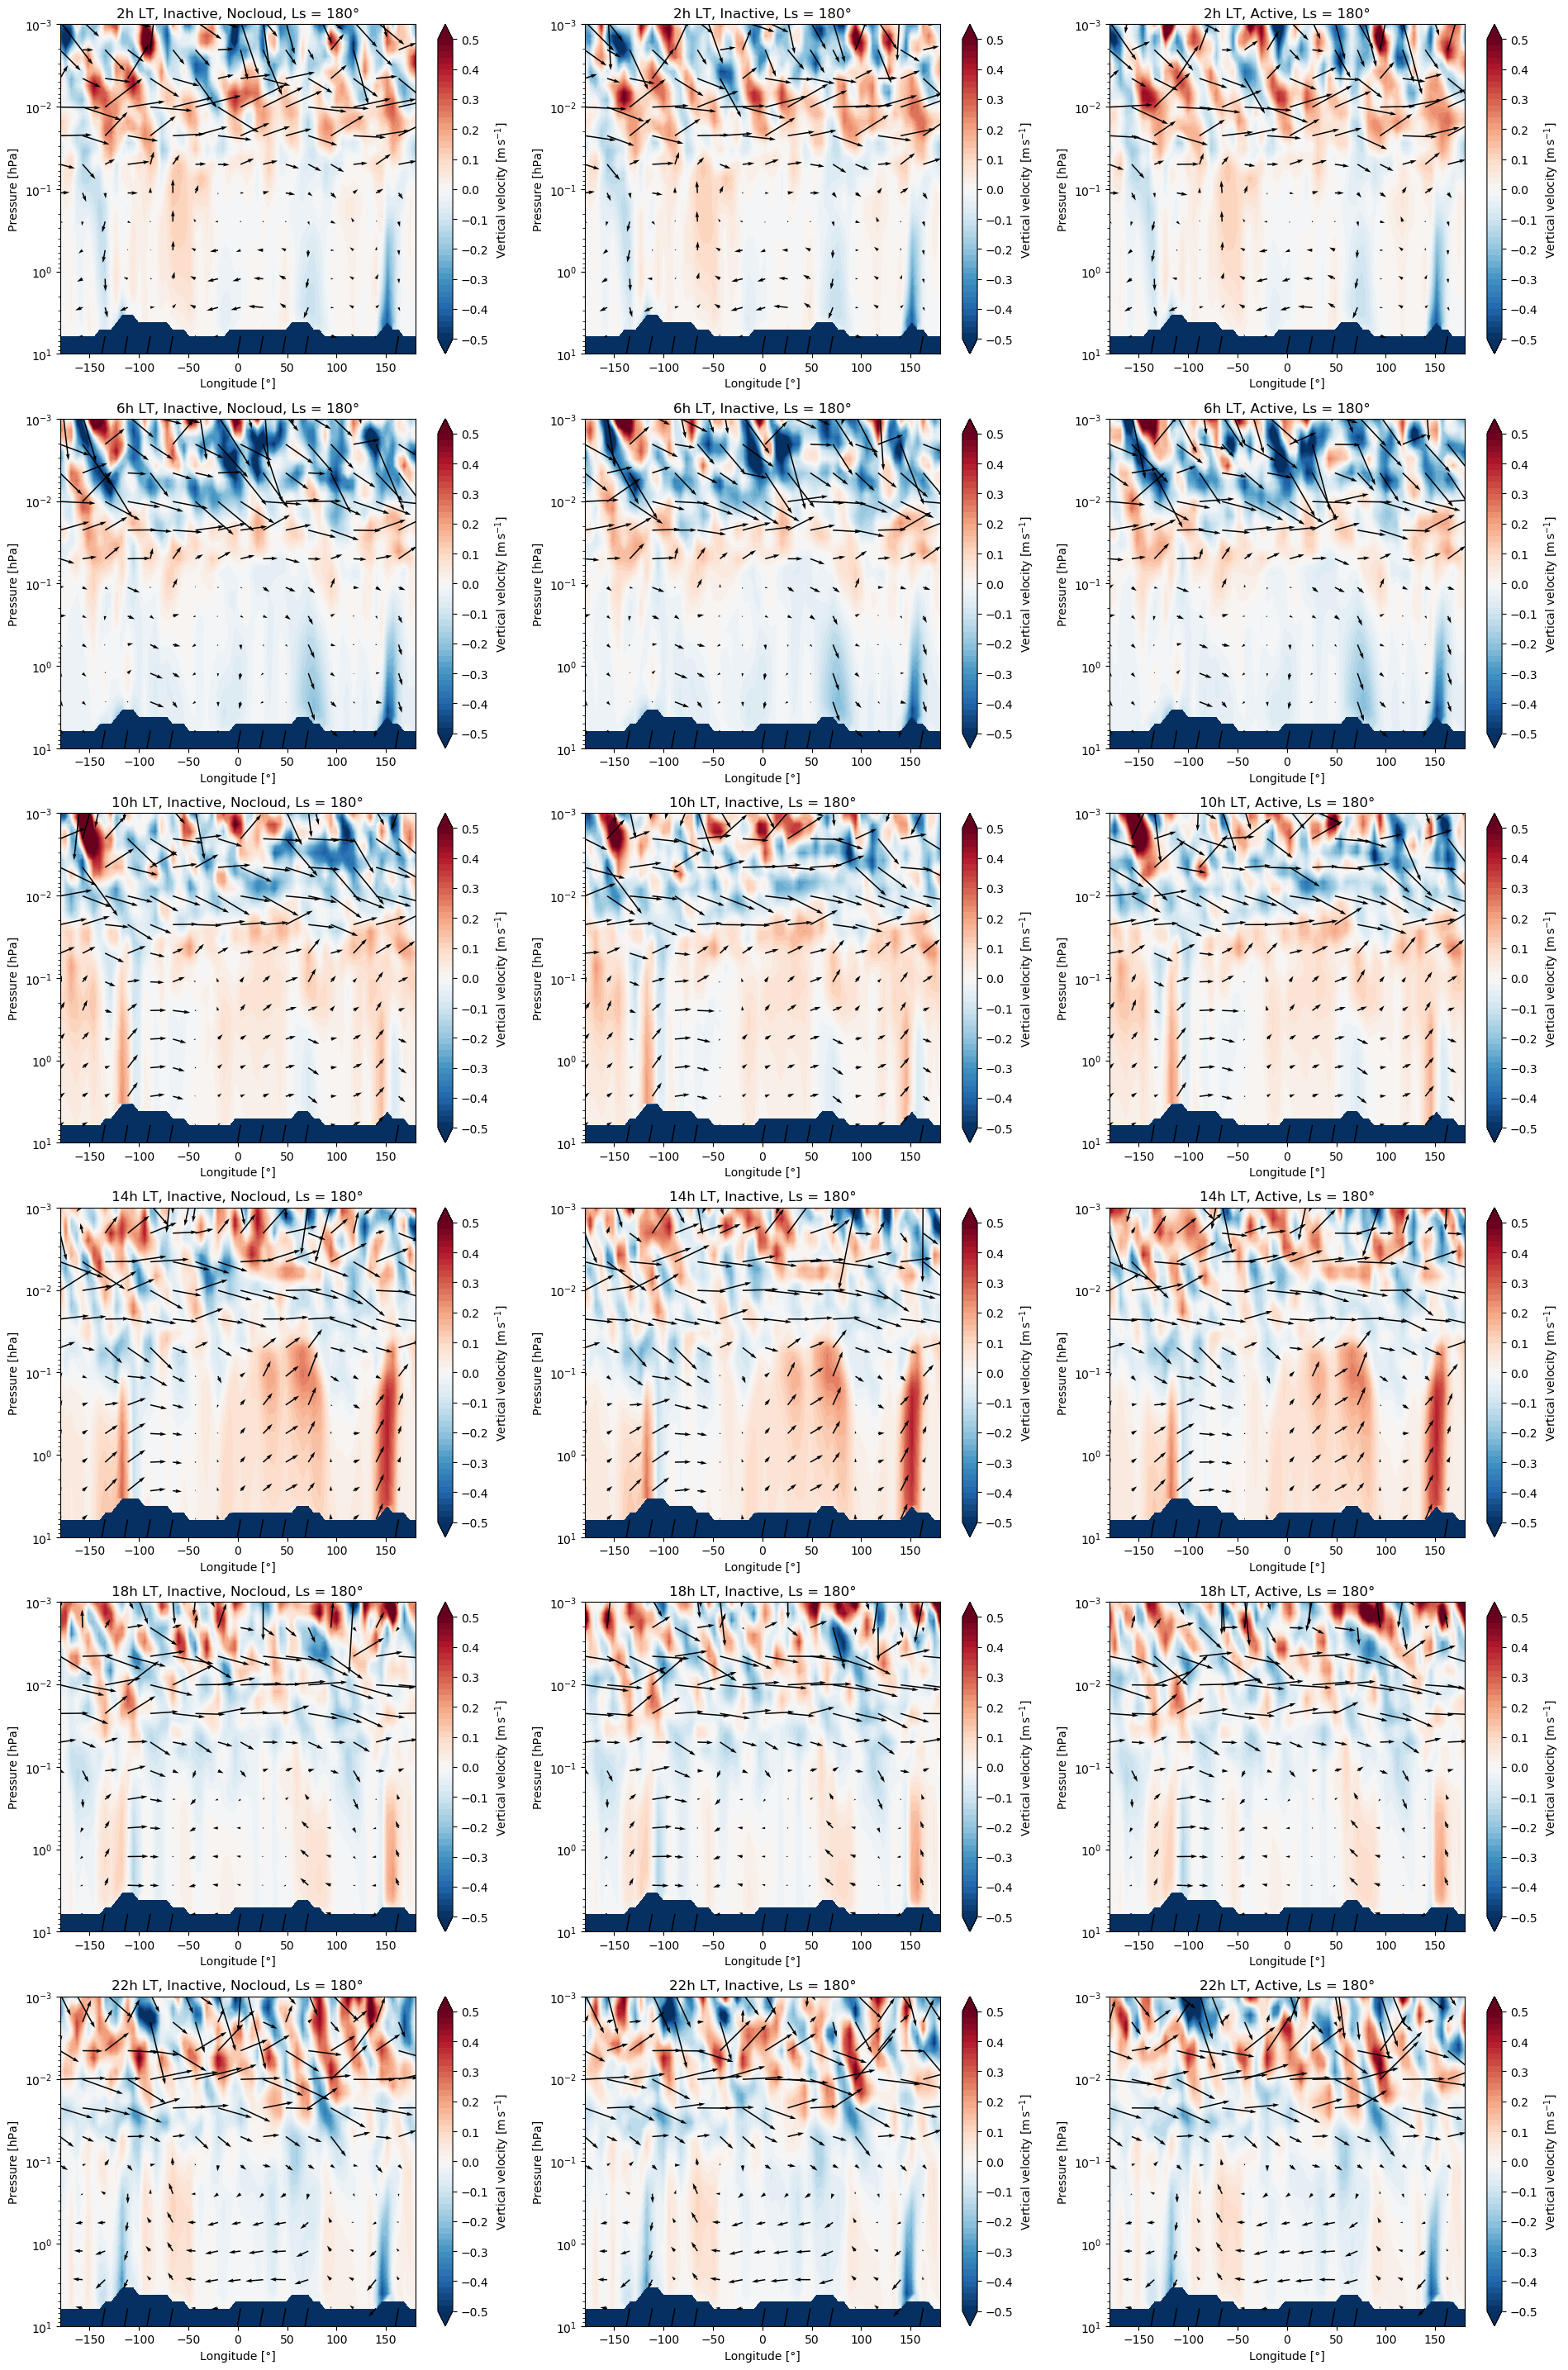

In [34]:
lat = 10
levels = np.arange(-0.5,0.51,0.02)
vertical_exag = 200
step=4

ncols,nrows = nf,6
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j=i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)
    mappable = axes[j,k].contourf(
        np.linspace(-180,180,64), plev,
        w[k,4*j+2,:,lat,:],
        levels=levels,
        extend='both',
        cmap=cmap,
    )
    plt.colorbar(mappable, ax=axes[j,k], ticks=levels[::5]).set_label(r'Vertical velocity [$\rm m \, s^{-1}$]')
    axes[j,k].quiver(
        np.linspace(-180,180,64)[::step], plev[::step],
        u[k,4*j+2,::step,lat,::step], w[k,4*j+2,::step,lat,::step]*vertical_exag,
        scale=700, scale_units='width'
    )
    axes[j,k].set_ylim(1e-3,10)
    axes[j,k].set_yscale('log')
    axes[j,k].invert_yaxis()
    axes[j,k].set_xlabel('Longitude [°]')
    axes[j,k].set_ylabel('Pressure [hPa]')
    axes[j,k].set_title(str(4*j+2)+'h LT, '+titles[k])
plt.show()

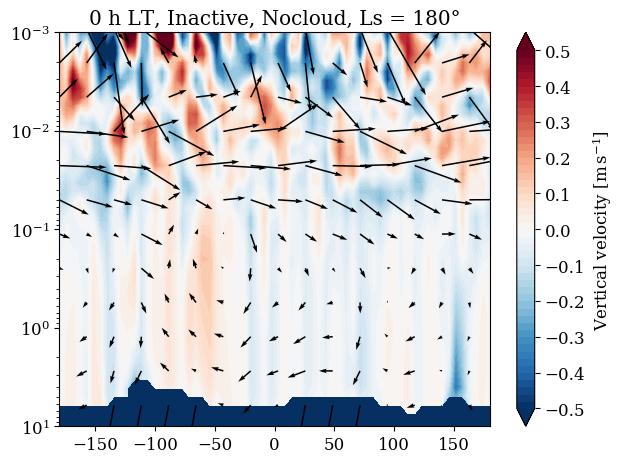

In [15]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

k=0
lat = 10
levels = np.arange(-0.5,0.51,0.02)
vertical_exag = 200
step=4
titles = [
    'Inactive, Nocloud, Ls = 180°',
    'Inactive, Ls = 180°',
    'Active, Ls = 180°',
]

ncols,nrows = 1,1
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,ax = plt.subplots(nrows=nrows, ncols=ncols)
mappable = ax.contourf(
    np.linspace(-180,180,64), plev,
    w[k,0,:,lat,:],
    levels=levels,
    extend='both',
    cmap=cmap,
)
plt.colorbar(mappable, ax=ax, ticks=levels[::5]).set_label(r'Vertical velocity [$\rm m \, s^{-1}$]')
ax.quiver(
    np.linspace(-180,180,64)[::step], plev[::step],
    u[k,0,::step,lat,::step], w[k,0,::step,lat,::step]*vertical_exag,
    scale=700, scale_units='width'
)
ax.set_ylim(1e-3,10)
ax.set_yscale('log')
ax.invert_yaxis()
ax.set_xlabel('Longitude [°]')
ax.set_ylabel('Pressure [hPa]')
title = ax.set_title(f'{0} h LT, '+titles[k])

def update(frame):
    ax.clear()
    mappable = ax.contourf(
        np.linspace(-180,180,64), plev,
        w[k,frame,:,lat,:],
        levels=levels,
        extend='both',
        cmap=cmap,
    )
    ax.quiver(
        np.linspace(-180,180,64)[::step], plev[::step],
        u[k,frame,::step,lat,::step], w[k,frame,::step,lat,::step]*vertical_exag,
        scale=700, scale_units='width'
    )
    ax.set_ylim(1e-3,10)
    ax.set_yscale('log')
    ax.invert_yaxis()
    title = ax.set_title(f'{frame} h LT, '+titles[k])
    return []

ani = animation.FuncAnimation(fig, update, frames=nt, interval=100, blit=False)
ani.save("simulation-wind_"+titles[k]+".gif", writer=PillowWriter(fps=5))

In [2]:
files = [
#    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180-nocloud/',
    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/',
    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/',
]
variables = [
    'RHOWTR-1h-p',
    'pivel-1h-p',
    'RHOAIR-1h-p',
    'U-1h-p',
]
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),10,24,70,32,64
data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
for i in range(nf):
    for j in range(nv):
        print(files[i] + variables[j] + '.asc')
        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
data = data.reshape(nf,nv,nd,nt,nz,ny,nx)

def localtime_aligner(dat,nx,deg):
    dat_local = np.zeros_like(dat)
    j=0 # initialize
    for i in range(nx):
        if (abs(15*j-deg*i) < 7.5):
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
        else:
            j=j+1
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
    return dat_local

def day_average(dat):
    return np.mean(dat, axis=2)

def roll_longitude(dat,nx):
    return np.roll(dat, int(nx/2), axis=-1)

deg = 5.625
data_local = localtime_aligner(data,nx,deg)
data_local_day_ave = day_average(data_local)
data_local_day_ave_roll_lon = roll_longitude(data_local_day_ave,nx)

/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/RHOWTR-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/pivel-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/RHOAIR-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/U-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/RHOWTR-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/pivel-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/RHOAIR-1h-p.asc
/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-Ls180/U-1h-p.asc


In [5]:
files = [
    '/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/',
]
variables = [
    'PS-1h',
]
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),10,24,1,32,64
data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
for i in range(nf):
    for j in range(nv):
        print(files[i] + variables[j] + '.asc')
        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
data = data.reshape(nf,nv,nd,nt,nz,ny,nx)

def localtime_aligner(dat,nx,deg):
    dat_local = np.zeros_like(dat)
    j=0 # initialize
    for i in range(nx):
        if (abs(15*j-deg*i) < 7.5):
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
        else:
            j=j+1
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
    return dat_local

def day_average(dat):
    return np.mean(dat, axis=2)

def roll_longitude(dat,nx):
    return np.roll(dat, int(nx/2), axis=-1)

deg = 5.625
PS_local = localtime_aligner(data,nx,deg)
PS_local_day_ave = day_average(PS_local)
PS_local_day_ave_roll_lon = roll_longitude(PS_local_day_ave,nx)

/mnt/dram2/koba/data/MIRAI1k-active-adsinhom-inactive-Ls180/PS-1h.asc


In [6]:
plev = np.array([
13.576     , 11.115     , 9.1001     , #3
7.4506     , 6.1000     , 4.9943     , #6
4.0890     , 3.3478     , 2.7409     , #9
2.2441     , 1.8373     , 1.5042     , #12
1.2316     , 1.0083     , 0.82555    , #15
0.67590    , 0.55338    , 0.45307    , #18
0.37094    , 0.30370    , 0.24865    , #21
0.20358    , 0.16667    , 0.13646    , #24
0.11173    , 9.14730E-02, 7.48918E-02, #27
6.13162E-02, 5.02015E-02, 4.11015E-02, #30
3.36510E-02, 2.75511E-02, 2.25570E-02, #33
1.84681E-02, 1.51204E-02, 1.23795E-02, #36
1.01355E-02, 8.29825E-03, 6.79403E-03, #39
5.56248E-03, 4.55417E-03, 3.72864E-03, #42
3.05275E-03, 2.49938E-03, 2.04632E-03, #45
1.67539E-03, 1.37169E-03, 1.12304E-03, #48
9.19472E-04, 7.52800E-04, 6.16340E-04, #51
5.04617E-04, 4.13145E-04, 3.38255E-04, #54
2.76940E-04, 2.26739E-04, 1.85638E-04, #57
1.51988E-04, 1.24437E-04, 1.01880E-04, #60
8.34126E-05, 6.82925E-05, 5.59131E-05, #63
4.57778E-05, 3.74797E-05, 3.06858E-05, #66
2.51234E-05, 2.05693E-05, 1.68407E-05, #69
1.37880E-05
])
import matplotlib.colors as colors
import copy
cmap = copy.copy(plt.get_cmap('RdBu_r')) # RdBu_r, Blues, GnBu, PuBu

(2, 4, 24, 70, 32, 64)


(2, 24, 70, 32, 64)
k,j,i =  0 0 0
k,j,i =  1 0 1
k,j,i =  0 1 2
k,j,i =  1 1 3
k,j,i =  0 2 4
k,j,i =  1 2 5
k,j,i =  0 3 6
k,j,i =  1 3 7
k,j,i =  0 4 8
k,j,i =  1 4 9
k,j,i =  0 5 10
k,j,i =  1 5 11


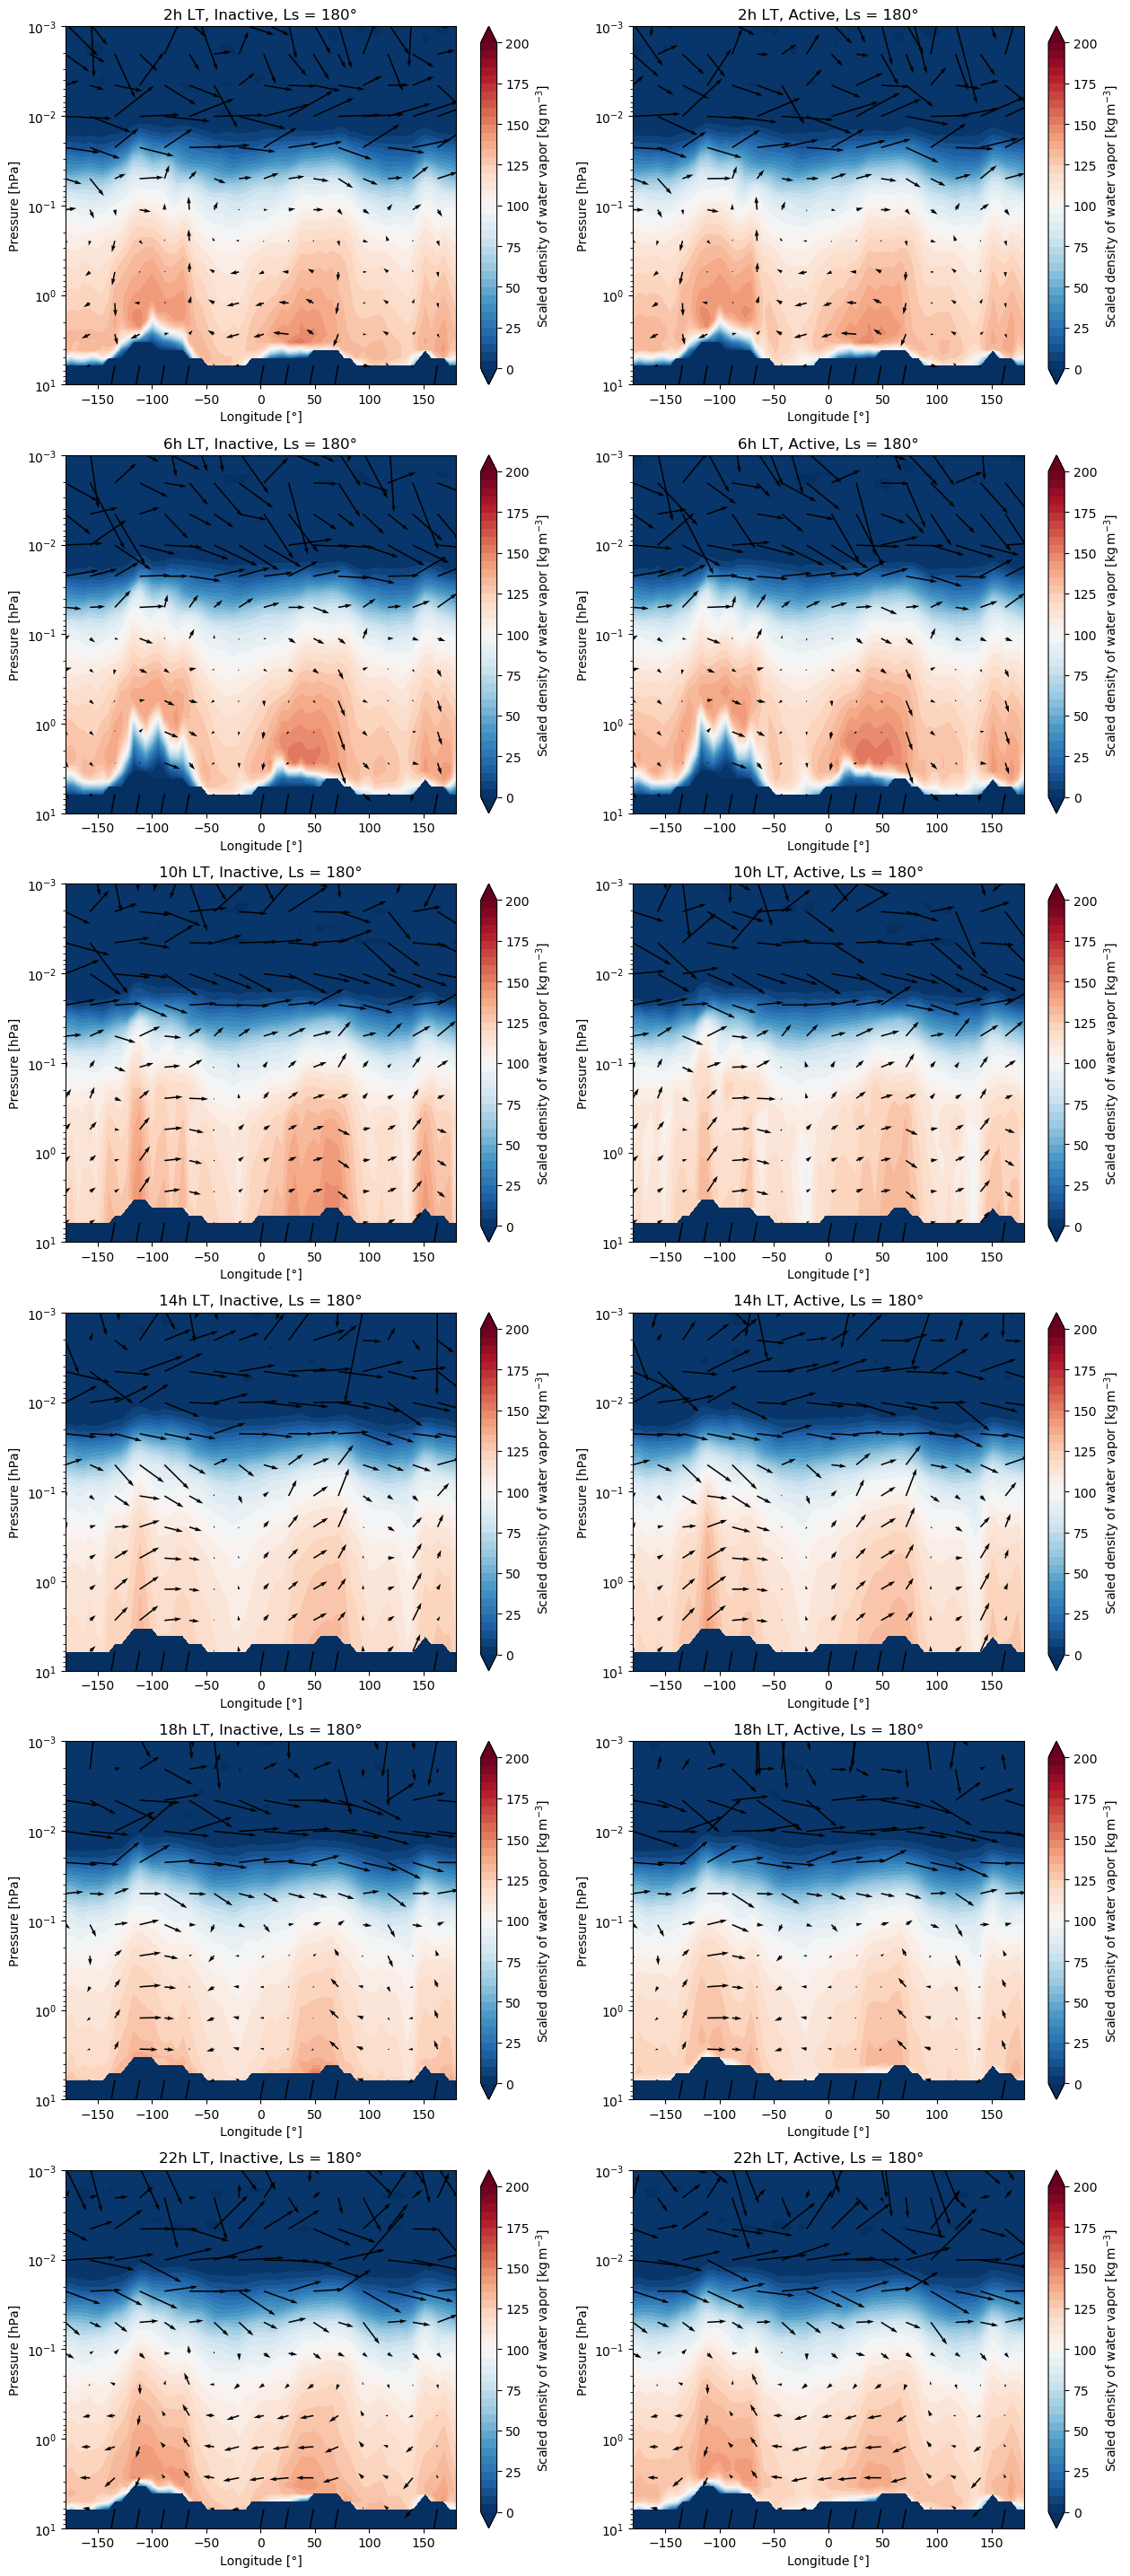

In [8]:
lat = 10
print(data_local_day_ave_roll_lon.shape)
scaled_wv = data_local_day_ave_roll_lon[:,0,:,:,:,:] * 1e8 / (PS_local_day_ave_roll_lon[:,0,:,:,:,:] * 1e2 / 610)

R = 188.9       # 空気の気体定数 [J/(kg K)]
g = 3.72        # 重力加速度 [m/s^2]

def pvel_to_w(omega, rho):
    # 単位変換
    w = - omega*1e2 / (rho * g)
    return w

omega = data_local_day_ave_roll_lon[:,1,:,:,:,:]
rho   = data_local_day_ave_roll_lon[:,2,:,:,:,:]
u     = data_local_day_ave_roll_lon[:,3,:,:,:,:]
w     = pvel_to_w(omega, rho)
print(w.shape)

lat = 10
vertical_exag = 200
step=4
titles = [
    'Inactive, Ls = 180°',
    'Active, Ls = 180°',
]

ncols,nrows = 2,6
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j=i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)
    mappable = axes[j,k].contourf(
        np.linspace(-180,180,64), plev,
        scaled_wv[k,4*j+2,:,lat,:],
        levels=np.arange(0,201,5),
        extend='both',
        cmap=cmap,
    )
    plt.colorbar(mappable, ax=axes[j,k]).set_label(r'Scaled density of water vapor [$\rm kg \, m^{-3}$]')
    axes[j,k].quiver(
        np.linspace(-180,180,64)[::step], plev[::step],
        u[k,4*j+2,::step,lat,::step], w[k,4*j+2,::step,lat,::step]*vertical_exag,
        scale=700, scale_units='width'
    )
    axes[j,k].set_ylim(1e-3,10)
    axes[j,k].set_yscale('log')
    axes[j,k].invert_yaxis()
    axes[j,k].set_xlabel('Longitude [°]')
    axes[j,k].set_ylabel('Pressure [hPa]')
    axes[j,k].set_title(str(4*j+2)+'h LT, '+titles[k])
plt.show()

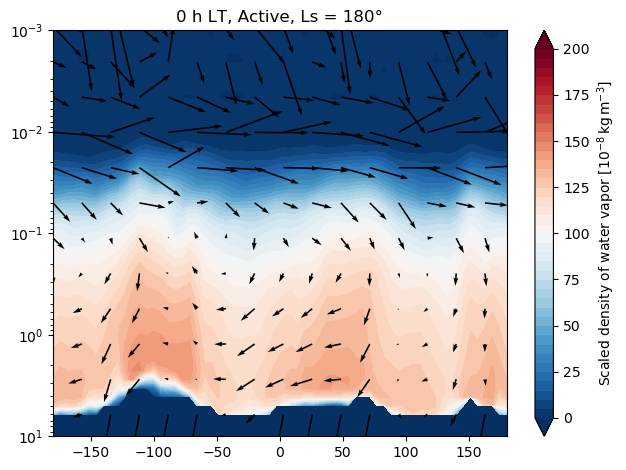

In [9]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

k=1

ncols,nrows = 1,1
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,ax = plt.subplots(nrows=nrows, ncols=ncols)
mappable = ax.contourf(
    np.linspace(-180,180,64), plev,
    scaled_wv[k,0,:,lat,:],
    levels=np.arange(0,201,5),
    extend='both',
    cmap=cmap,
)
plt.colorbar(mappable, ax=ax).set_label(r'Scaled density of water vapor [$\rm 10^{-8} \, kg \, m^{-3}$]')
ax.quiver(
    np.linspace(-180,180,64)[::step], plev[::step],
    u[k,0,::step,lat,::step], w[k,0,::step,lat,::step]*vertical_exag,
    scale=700, scale_units='width'
)
ax.set_ylim(1e-3,10)
ax.set_yscale('log')
ax.invert_yaxis()
ax.set_xlabel('Longitude [°]')
ax.set_xlabel('Pressure [hPa]')
title = ax.set_title(f'{0} h LT, '+titles[k])

def update(frame):
    ax.clear()
    mappable = ax.contourf(
        np.linspace(-180,180,64), plev,
        scaled_wv[k,frame,:,lat,:],
        levels=np.arange(0,201,5),
        extend='both',
        cmap=cmap,
    )
    ax.quiver(
        np.linspace(-180,180,64)[::step], plev[::step],
        u[k,frame,::step,lat,::step], w[k,frame,::step,lat,::step]*vertical_exag,
        scale=700, scale_units='width'
    )
    ax.set_ylim(1e-3,10)
    ax.set_yscale('log')
    ax.invert_yaxis()
    title = ax.set_title(f'{frame} h LT, '+titles[k])
    return []

ani = animation.FuncAnimation(fig, update, frames=nt, interval=100, blit=False)
ani.save("simulation-RHOH2O_with_wind_"+titles[k]+".gif", writer=PillowWriter(fps=5))

0 -180.0
1 -174.28571428571428
2 -168.57142857142858
3 -162.85714285714286
4 -157.14285714285714
5 -151.42857142857142
6 -145.71428571428572
7 -140.0
8 -134.28571428571428
9 -128.57142857142856
10 -122.85714285714286
11 -117.14285714285714
12 -111.42857142857143
13 -105.71428571428571
14 -100.0
15 -94.28571428571428
16 -88.57142857142857
17 -82.85714285714286
18 -77.14285714285714
19 -71.42857142857143
20 -65.71428571428571
21 -60.0
22 -54.28571428571428
23 -48.571428571428555
24 -42.85714285714286
25 -37.14285714285714
26 -31.428571428571416
27 -25.714285714285722
28 -20.0
29 -14.285714285714278
30 -8.571428571428555
31 -2.857142857142861
32 2.857142857142861
33 8.571428571428584
34 14.285714285714278
35 20.0
36 25.714285714285722
37 31.428571428571445
38 37.14285714285714
39 42.85714285714286
40 48.571428571428584
41 54.28571428571428
42 60.0
43 65.71428571428572
44 71.42857142857144
45 77.14285714285717
46 82.85714285714289
47 88.57142857142856
48 94.28571428571428
49 100.0
50 105.7

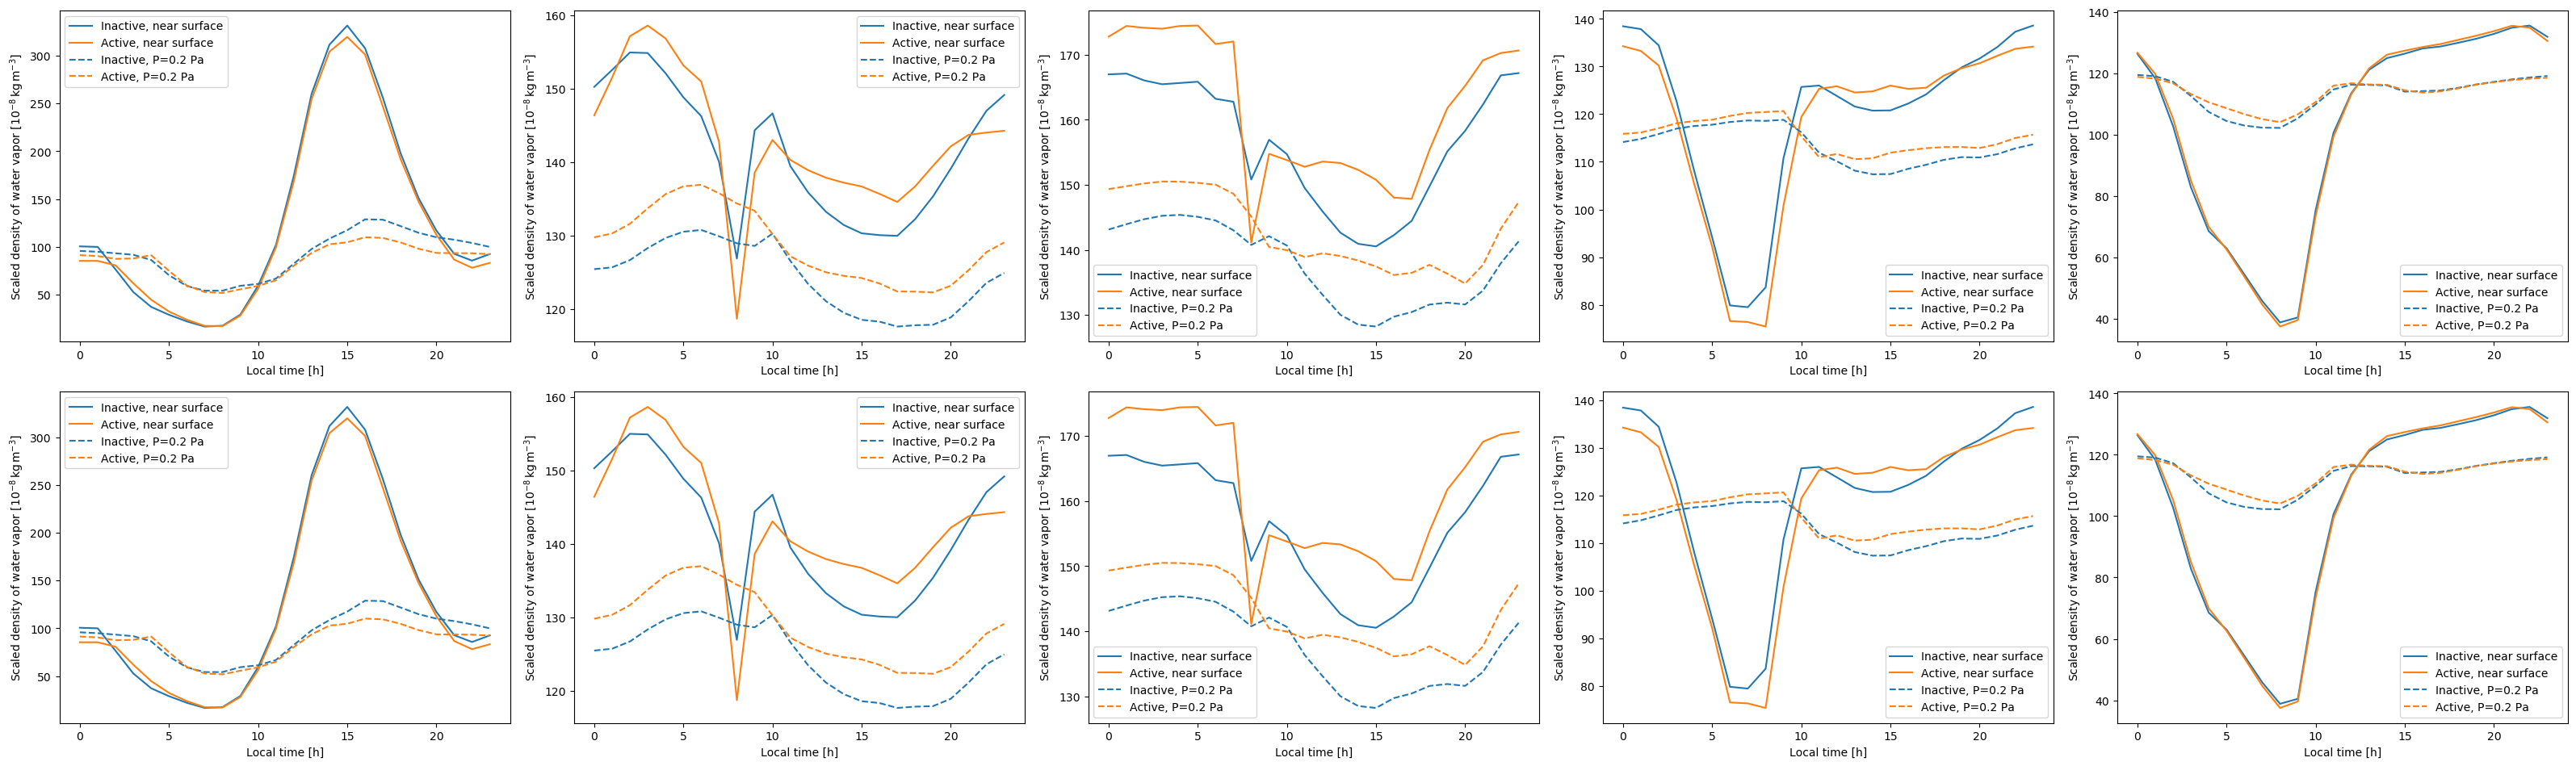

In [33]:
x = np.linspace(-180,180,64)
for i in range(len(x)):
    print(i, x[i])
#surf,pres,lat,lon = 9,21,15,10
#surf,pres,lat,lon = 9,21,15,40
surf,pres,lat,lon = 9,21,10,10
#surf,pres,lat,lon = 9,21,10,40
lat = [25,20,15,10,5]

ncols,nrows = 5,2
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]
plt.rcParams['figure.autolayout'] = True
fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j=i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)
#    axes[j,k].plot(w[0,:,surf,lat,lon], label='near surface')
#    axes[j,k].plot(w[1,:,surf,lat,lon], label='near surface')
#    axes[j,k].plot(w[0,:,pres,lat,lon],color='tab:blue'  ,linestyle='dashed', label='P=0.2 Pa')
#    axes[j,k].plot(w[1,:,pres,lat,lon],color='tab:orange',linestyle='dashed', label='P=0.2 Pa')

    axes[j,k].plot(scaled_wv[0,:,surf,lat[k],lon], label='Inactive, near surface')
    axes[j,k].plot(scaled_wv[1,:,surf,lat[k],lon], label='Active, near surface')
    axes[j,k].plot(scaled_wv[0,:,pres,lat[k],lon],color='tab:blue'  ,linestyle='dashed', label='Inactive, P=0.2 Pa')
    axes[j,k].plot(scaled_wv[1,:,pres,lat[k],lon],color='tab:orange',linestyle='dashed', label='Active, P=0.2 Pa')

    axes[j,k].set_xlabel('Local time [h]')
    axes[j,k].set_ylabel(r'Scaled density of water vapor [$\rm 10^{-8} \, kg \, m^{-3}$]')
    axes[j,k].legend()
#    axes[j,k].set_title(str(4*j+2)+'h LT, '+titles[k])
plt.show()